In [2]:
import numpy as np
from numpy import mean
from numpy import absolute
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
dt=pd.read_csv(R'C:\Users\Name\Desktop\Python\CASE 1\7B21E008.csv')

In [4]:
dt.head(10)

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.00,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.00,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.00,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.10,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.00,0.0,3,11
5,2016,10,1,5,14,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.00,0.0,3,15
6,2016,10,1,6,38,1,fall,17.78,64.0,100.0,12.0,0.0,30.1,0.00,0.0,3,42
7,2016,10,1,7,104,1,fall,17.78,64.0,100.0,13.0,0.0,30.1,0.00,0.0,3,115
8,2016,10,1,8,133,1,fall,17.78,64.0,100.0,14.0,0.0,30.1,0.00,0.2,3,146
9,2016,10,1,9,145,1,fall,17.78,63.5,98.0,9.0,0.0,30.1,0.05,0.0,3,174


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17466 non-null  int64  
 1   month        17466 non-null  int64  
 2   day          17466 non-null  int64  
 3   hour         17466 non-null  int64  
 4   member       17466 non-null  int64  
 5   weekend      17466 non-null  int64  
 6   season       17466 non-null  object 
 7   temperature  17466 non-null  float64
 8   dewpoint     17466 non-null  float64
 9   humidity     17466 non-null  float64
 10  windspeed    17466 non-null  float64
 11  windgust     17466 non-null  float64
 12  pressure     17466 non-null  float64
 13  precip       17466 non-null  float64
 14  precipaccum  17466 non-null  float64
 15  weather      17466 non-null  int64  
 16  rental       17466 non-null  int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 2.3+ MB


In [6]:
#checking for missing data values

dt.isna().any().any()

False

D:\Phyt\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


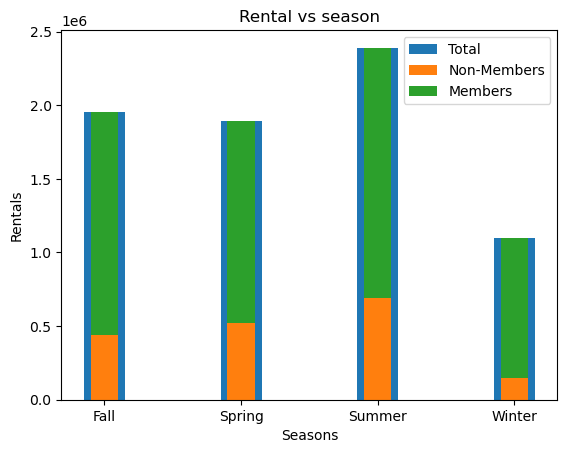

,season,rental,member,non_member
0,fall,1956360,1520215,436145
1,spring,1892861,1372615,520246
2,summer,2390450,1702106,688344
3,winter,1098580,952312,146268


In [7]:
#Rental wrt season 

dtseason=dt.groupby(['season'])['rental','member'].sum().reset_index()
dtseason['non_member'] = dtseason['rental'] - dtseason['member']

plt.bar(dtseason['season'],dtseason['rental'],0.3)
plt.bar(dtseason['season'],dtseason['non_member'],0.2)
plt.bar(dtseason['season'],dtseason['member'],0.2,bottom=dtseason['non_member'])


#customization

plt.xlabel('Seasons')
plt.ylabel('Rentals')
plt.xticks(dtseason['season'],['Fall','Spring','Summer','Winter'])
plt.title('Rental vs season')
plt.legend(['Total','Non-Members','Members'], loc = 0)
plt.rcParams['figure.figsize'] = (30,5)
plt.show()

dtseason

D:\Phyt\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


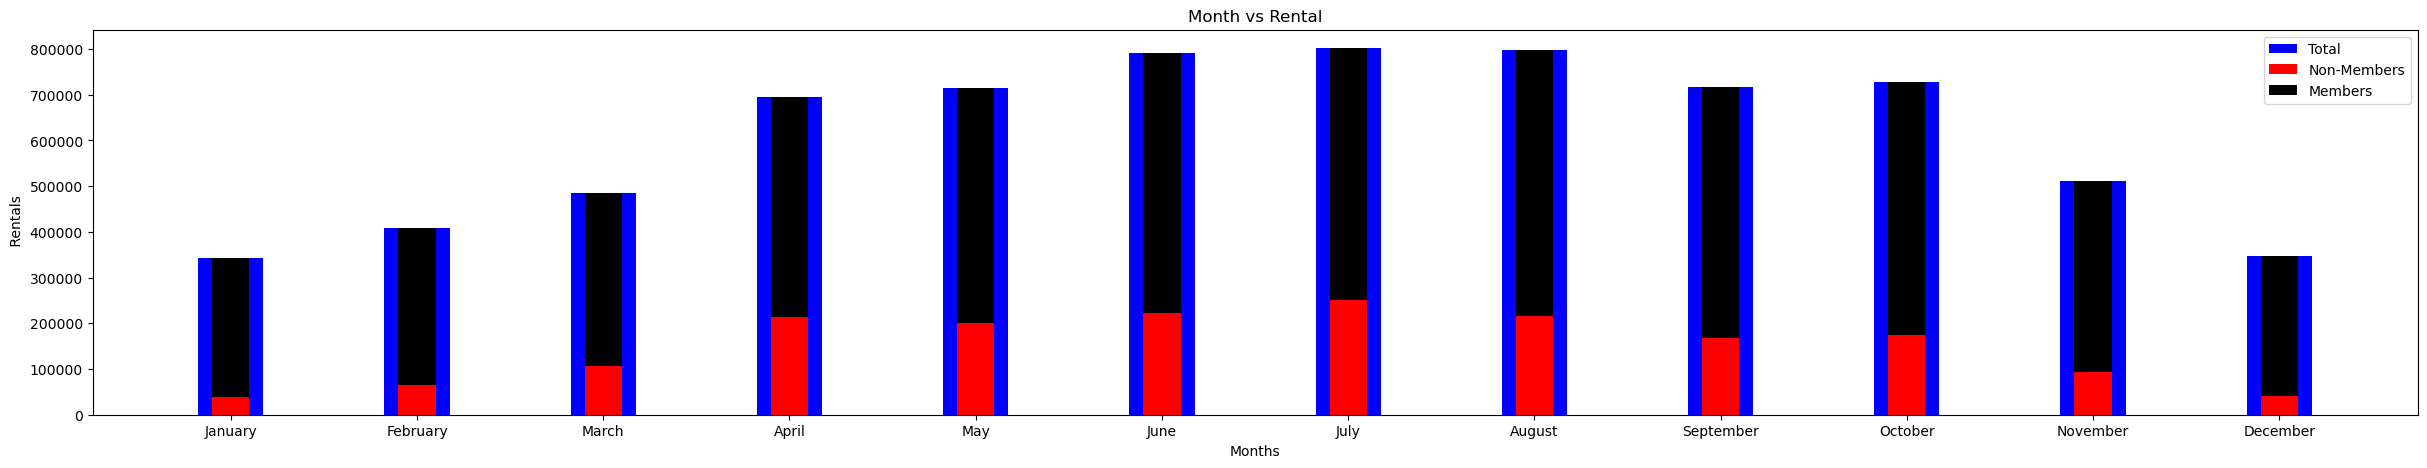

,month,rental,member,non_member
0,1,343394,304525,38869
1,2,408681,342826,65855
2,3,484313,377920,106393
3,4,694865,481027,213838
4,5,713683,513668,200015
5,6,791048,569019,222029
6,7,801988,551792,250196
7,8,797414,581295,216119
8,9,716710,549774,166936
9,10,728010,553125,174885


In [8]:
#Rental wrt month 

dtmonth=dt.groupby(['month'])['rental','member'].sum().reset_index()
dtmonth['non_member'] = dtmonth['rental'] - dtmonth['member']

plt.bar(dtmonth['month'],dtmonth['rental'],0.35,color='blue')
plt.bar(dtmonth['month'],dtmonth['non_member'], 0.2,color='red')
plt.bar(dtmonth['month'],dtmonth['member'],0.2,bottom=dtmonth['non_member'],color='Black')




#customization

plt.xlabel("Months")
plt.ylabel(' Rentals')
m = [x for x in calendar.month_name if x]
plt.xticks(dtmonth['month'],m)
plt.title("Month vs Rental")
plt.legend(["Total","Non-Members","Members"])
plt.rcParams["figure.figsize"] = (30,10)
plt.show()
dtmonth

D:\Phyt\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


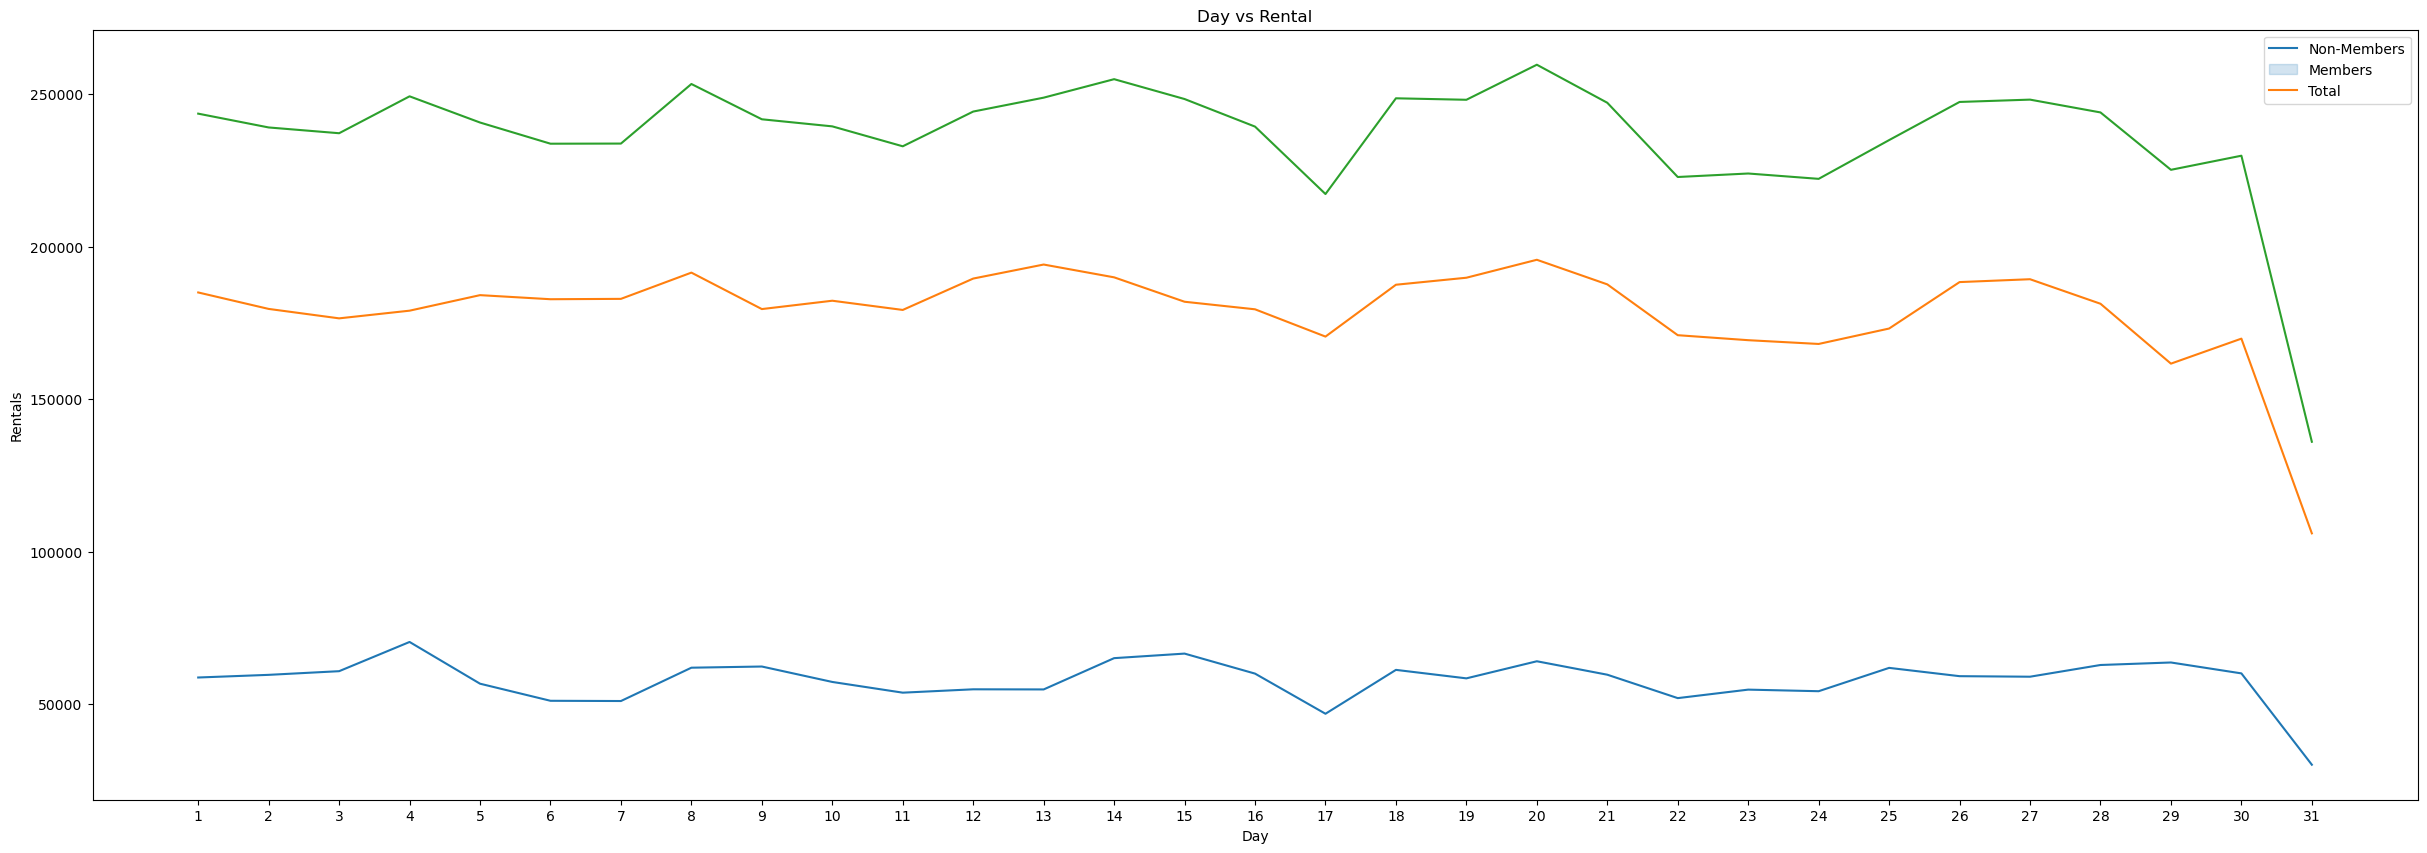

,day,rental,member,non_member
0,1,243679,185009,58670
1,2,239148,179608,59540
2,3,237255,176512,60743
3,4,249364,179031,70333
4,5,240767,184128,56639
5,6,233817,182788,51029
6,7,233860,182908,50952
7,8,253406,191519,61887
8,9,241830,179557,62273
9,10,239505,182295,57210


In [9]:
#Rental wrt day 

dtday=dt.groupby(['day'])['rental','member'].sum().reset_index()
dtday['non_member'] = dtday['rental'] - dtday['member']


sns.lineplot(x=dtday['day'],y=dtday['non_member'])
sns.lineplot(x=dtday['day'],y=dtday['member'])
sns.lineplot(x=dtday['day'],y=dtday['rental'])


#customization

plt.xlabel("Day")
plt.ylabel('Rentals')
plt.xticks(dtday['day'],dtday['day'])
plt.title("Day vs Rental")
plt.legend(["Non-Members","Members","Total"])
plt.rcParams["figure.figsize"] = (25,10)
plt.show()
dtday

D:\Phyt\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


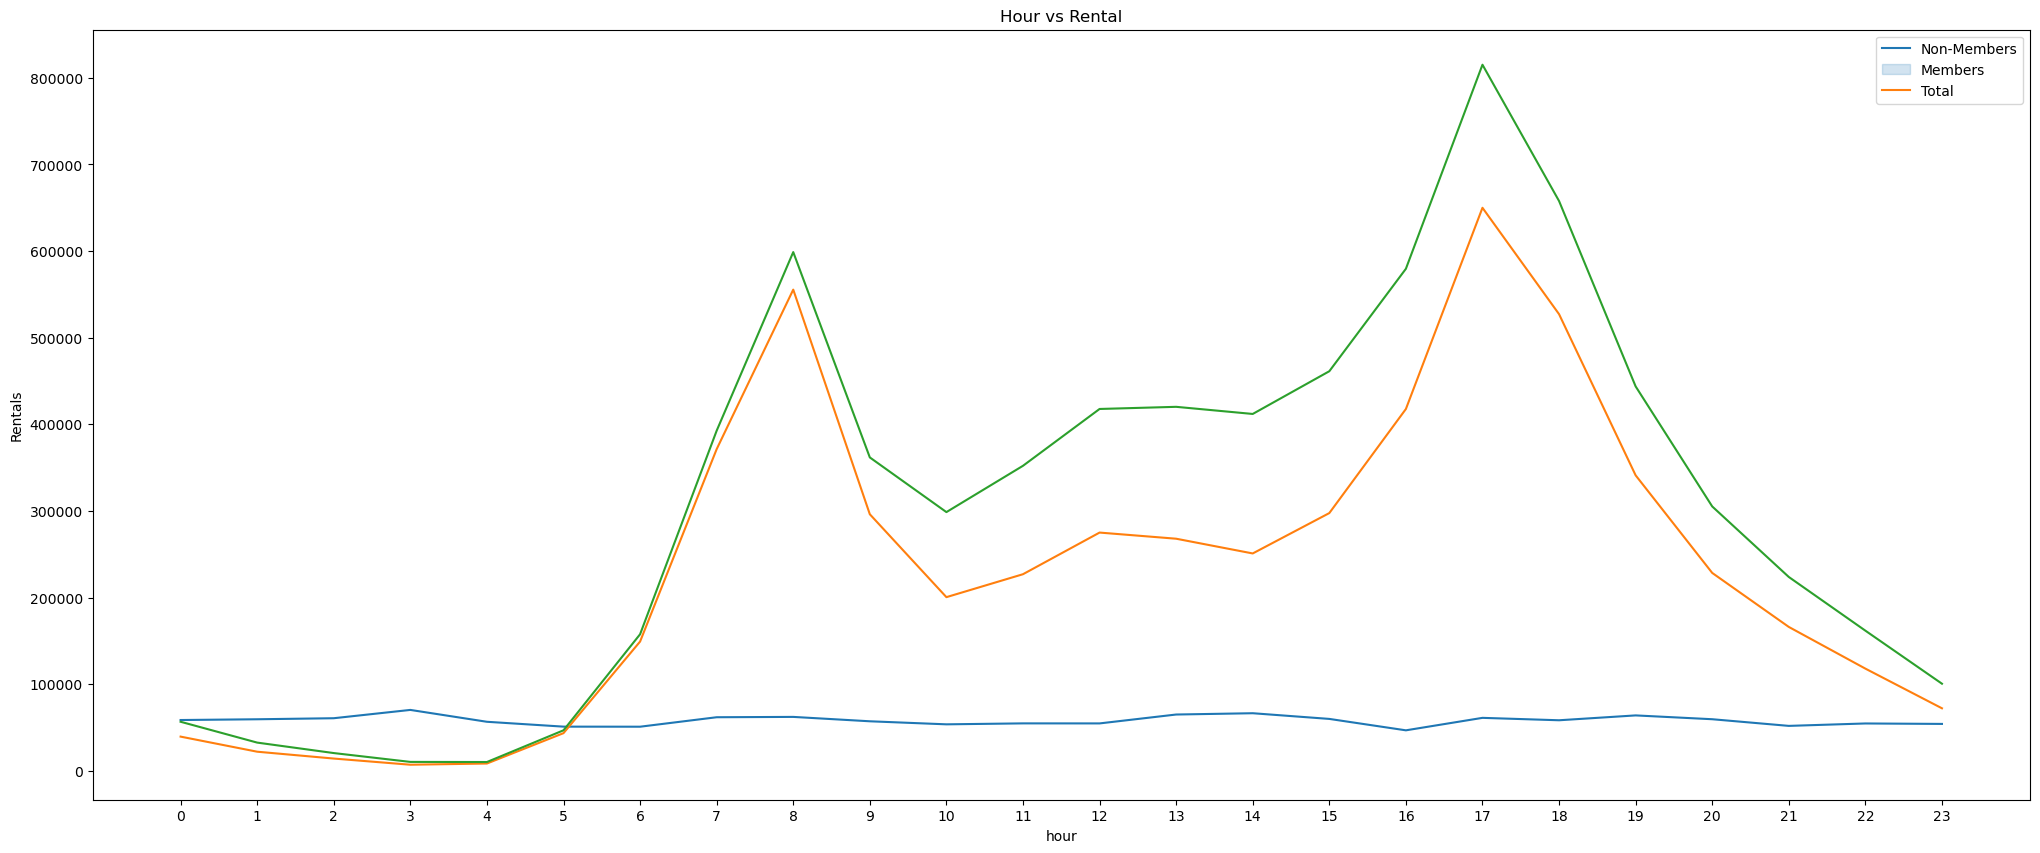

,hour,rental,member,non_member
0,0,56663,39513,58670
1,1,32605,22096,59540
2,2,20525,14185,60743
3,3,10324,7066,70333
4,4,10192,8448,56639
5,5,46802,43517,51029
6,6,157692,149241,50952
7,7,392667,371365,61887
8,8,598874,555527,62273
9,9,361819,296216,57210


In [10]:
#Rental wrt hour 

dthr=dt.groupby(['hour'])['rental','member'].sum().reset_index()
dthr['non_member'] = dtday['rental'] - dtday['member']


sns.lineplot(x=dthr['hour'],y=dthr['non_member'])
sns.lineplot(x=dthr['hour'],y=dthr['member'])
sns.lineplot(x=dthr['hour'],y=dthr['rental'])


#customization

plt.xlabel("hour")
plt.ylabel('Rentals')
plt.xticks(dthr['hour'],dthr['hour'])
plt.title("Hour vs Rental")
plt.legend(["Non-Members","Members","Total"])
plt.rcParams["figure.figsize"] = (25,10)
plt.show()
dthr

D:\Phyt\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


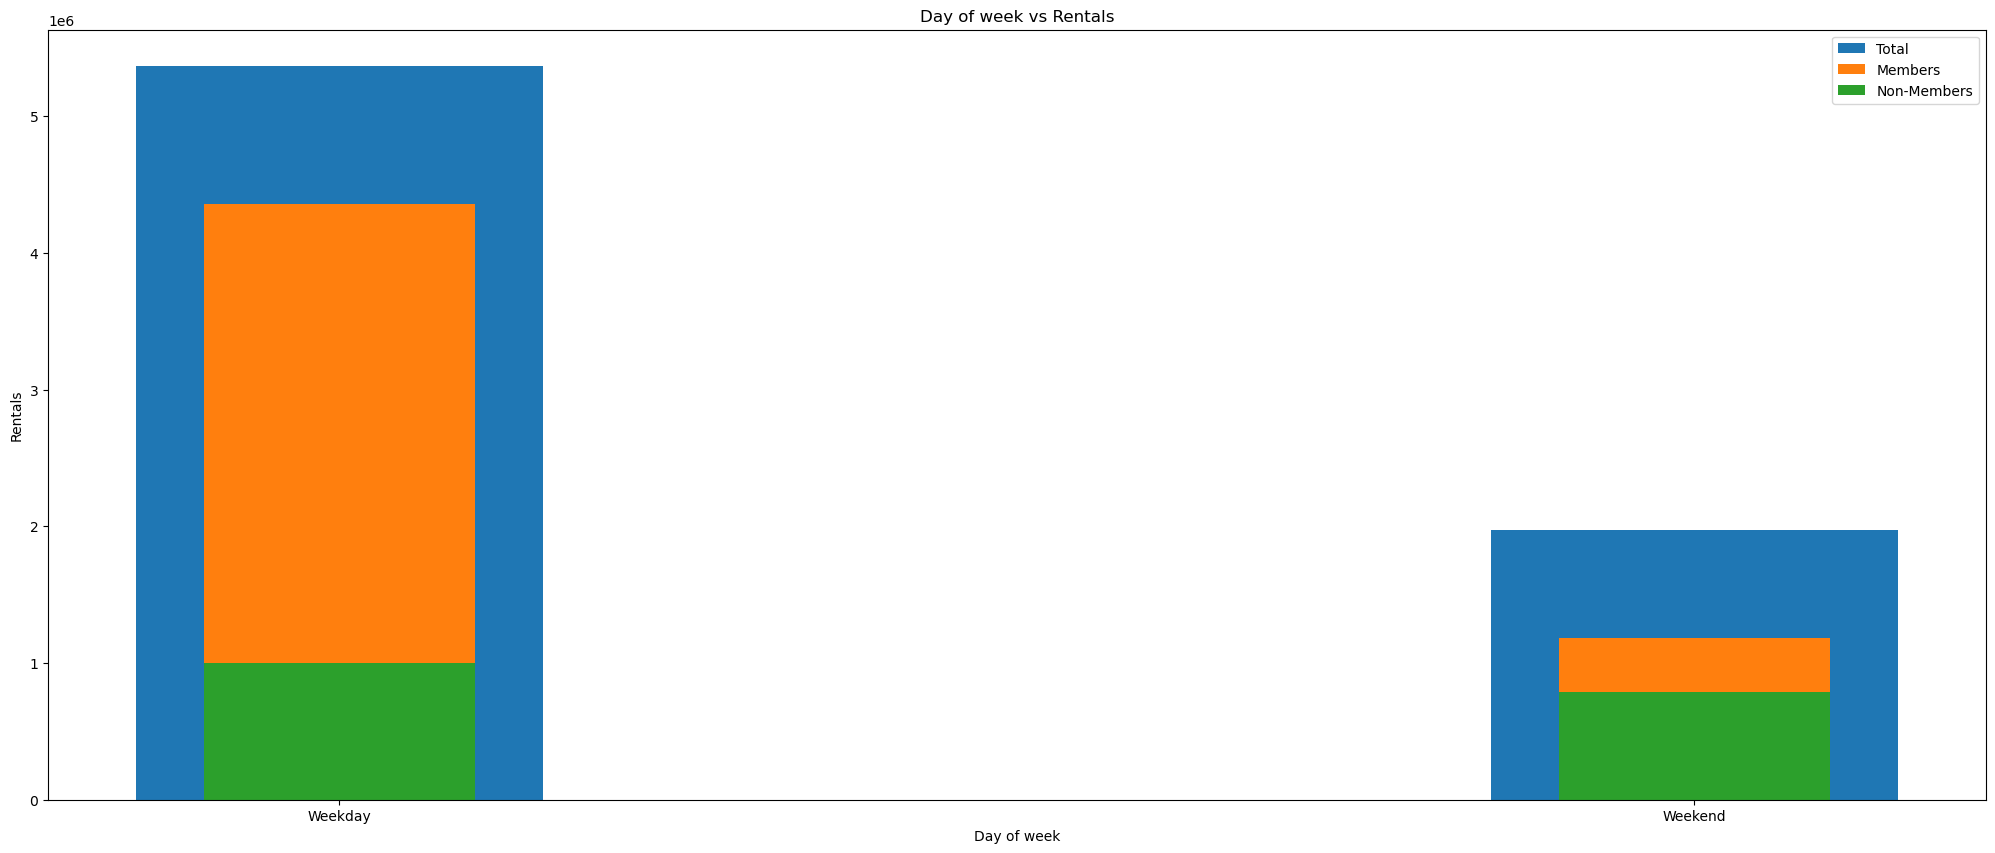

,weekend,rental,member,non_member
0,0,5365299,4362021,1003278
1,1,1972952,1185227,787725


In [11]:
#Rental wrt weekend

dtweekend=dt.groupby(['weekend'])['rental','member'].sum().reset_index()

dtweekend['non_member'] = dtweekend['rental'] - dtweekend['member']

plt.bar(dtweekend['weekend'],dtweekend['rental'],0.3)
plt.bar(dtweekend['weekend'],dtweekend['member'],0.2)
plt.bar(dtweekend['weekend'],dtweekend['non_member'],0.2)





#customization

plt.xlabel("Day of week")
plt.ylabel('Rentals')
plt.xticks(dtweekend['weekend'],["Weekday","Weekend"])#)
plt.title("Day of week vs Rentals")
plt.legend(["Total","Members","Non-Members"])
plt.rcParams["figure.figsize"] = (30,10)
plt.show()
dtweekend

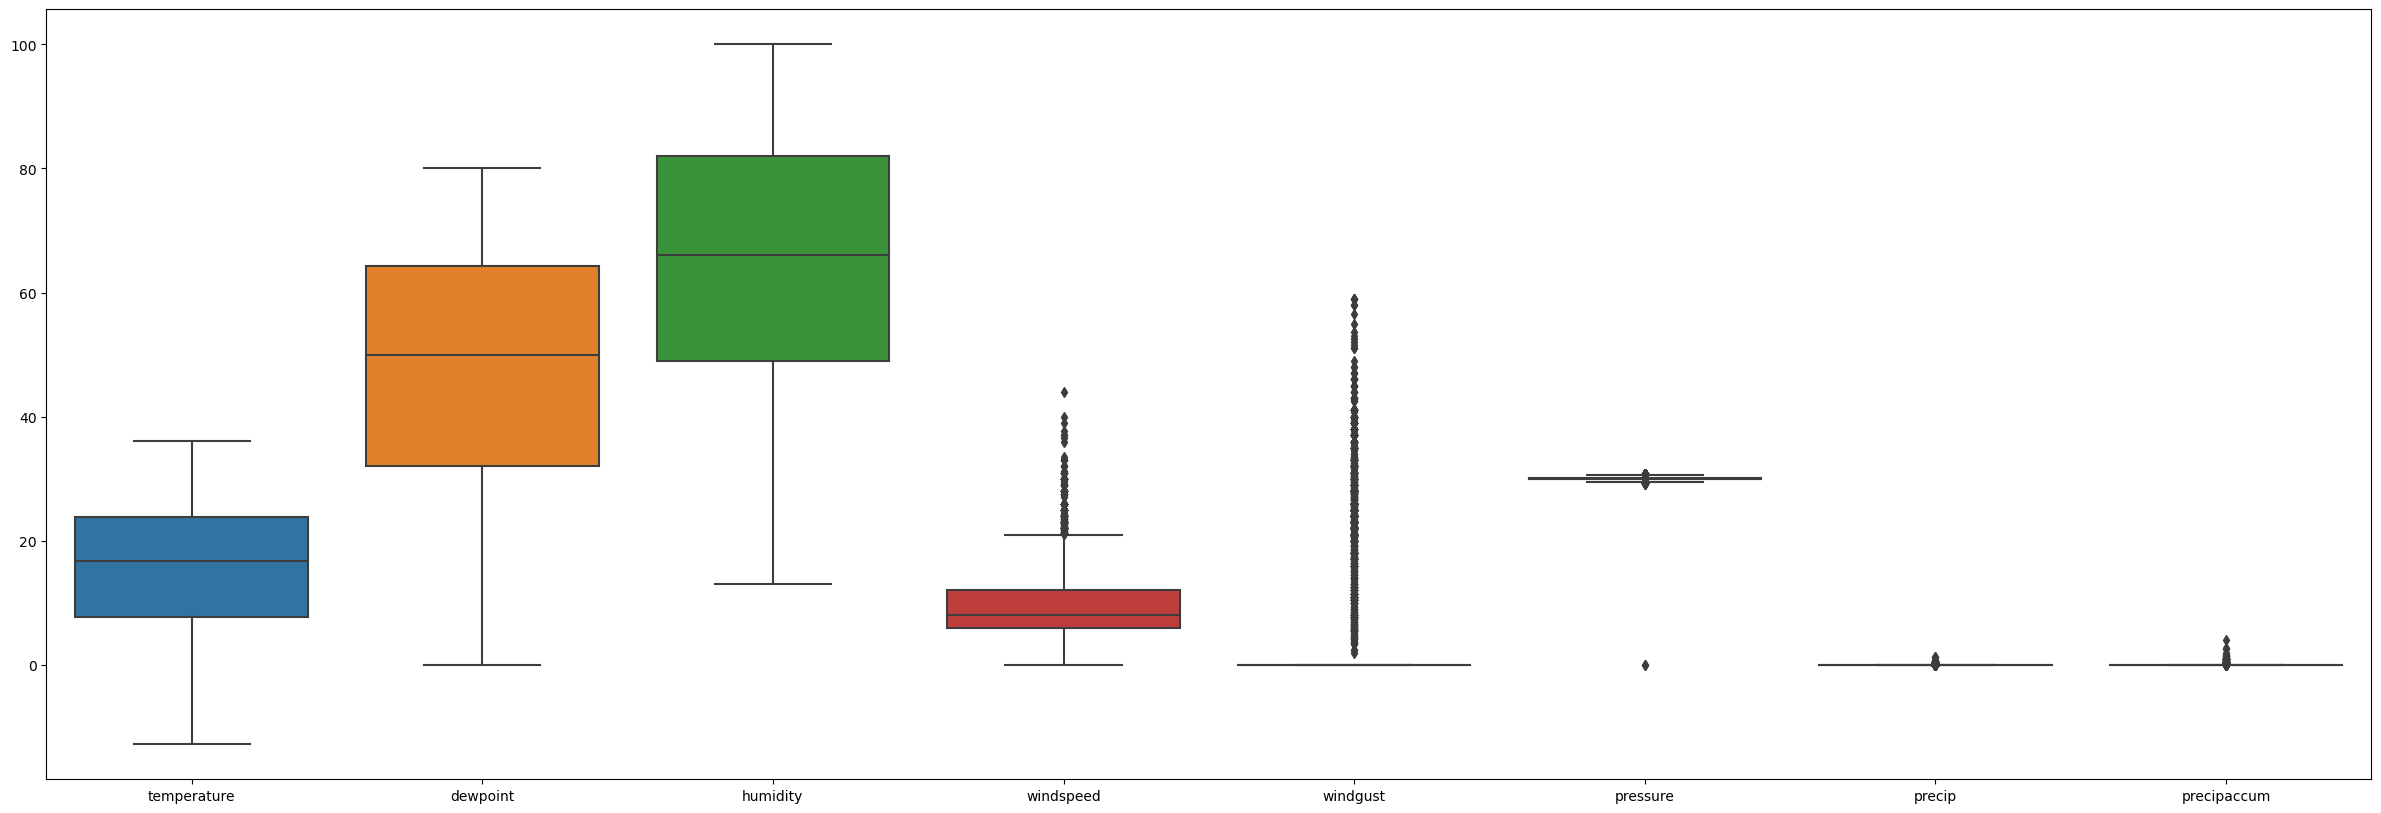

In [12]:
#Evaluating Factors of data range

sns.boxplot(data= dt.loc[:,['temperature','dewpoint','humidity','windspeed','windgust','pressure','precip','precipaccum']])
plt.rcParams["figure.figsize"] = (30,10)

In [13]:
#Checking Temperature impact on rental
dttemp=dt.groupby(['temperature'])['rental'].sum().reset_index()
dttemp.head(5)


,temperature,rental
0,-12.78,5
1,-12.22,83
2,-11.67,108
3,-11.11,17
4,-10.56,1740


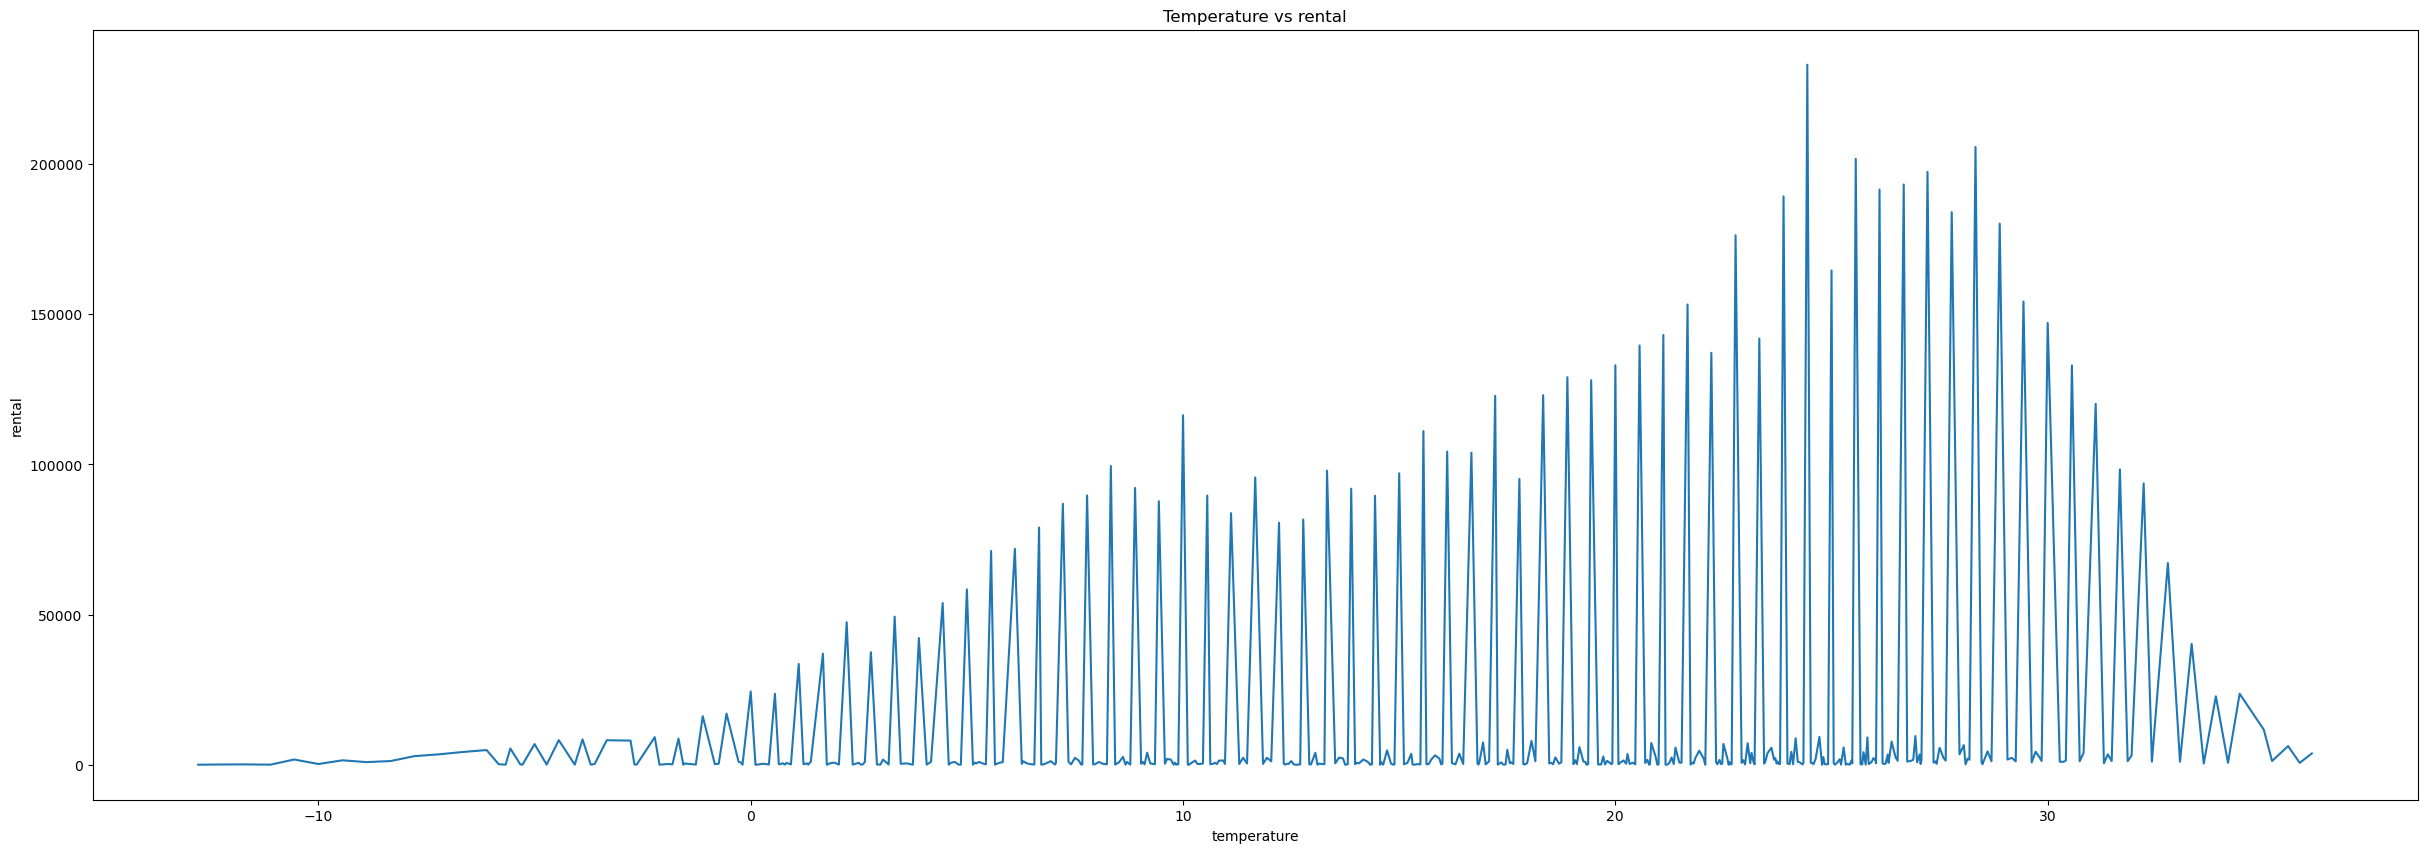

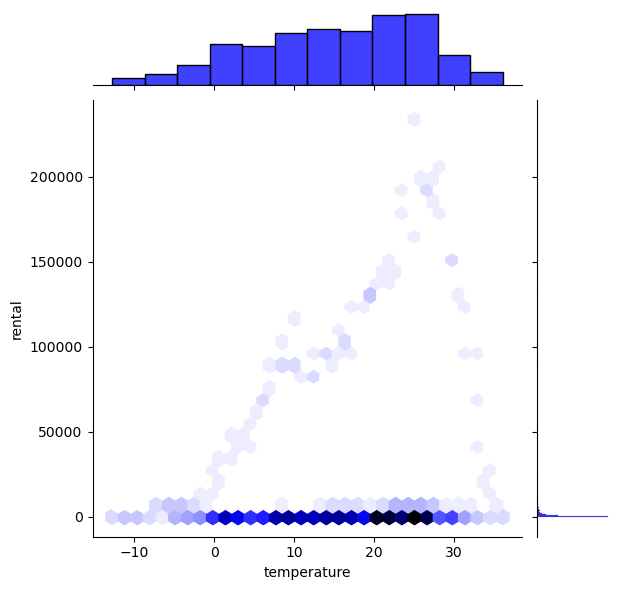

In [14]:
plt.plot(dttemp['temperature'],dttemp['rental'])
plt.xlabel('temperature')
plt.ylabel('rental')
plt.title("Temperature vs rental")
sns.jointplot(x=dttemp['temperature'],y=dttemp['rental'],data=dttemp,kind='hex',color='blue')

In [15]:
#Checking Dewpoint impact on rental

dtdew=dt.groupby(['dewpoint'])['rental'].sum().reset_index()

dtdew.head(5)

,dewpoint,rental
0,0.0,4440
1,1.0,10410
2,2.0,10514
3,3.0,10323
4,4.0,8885


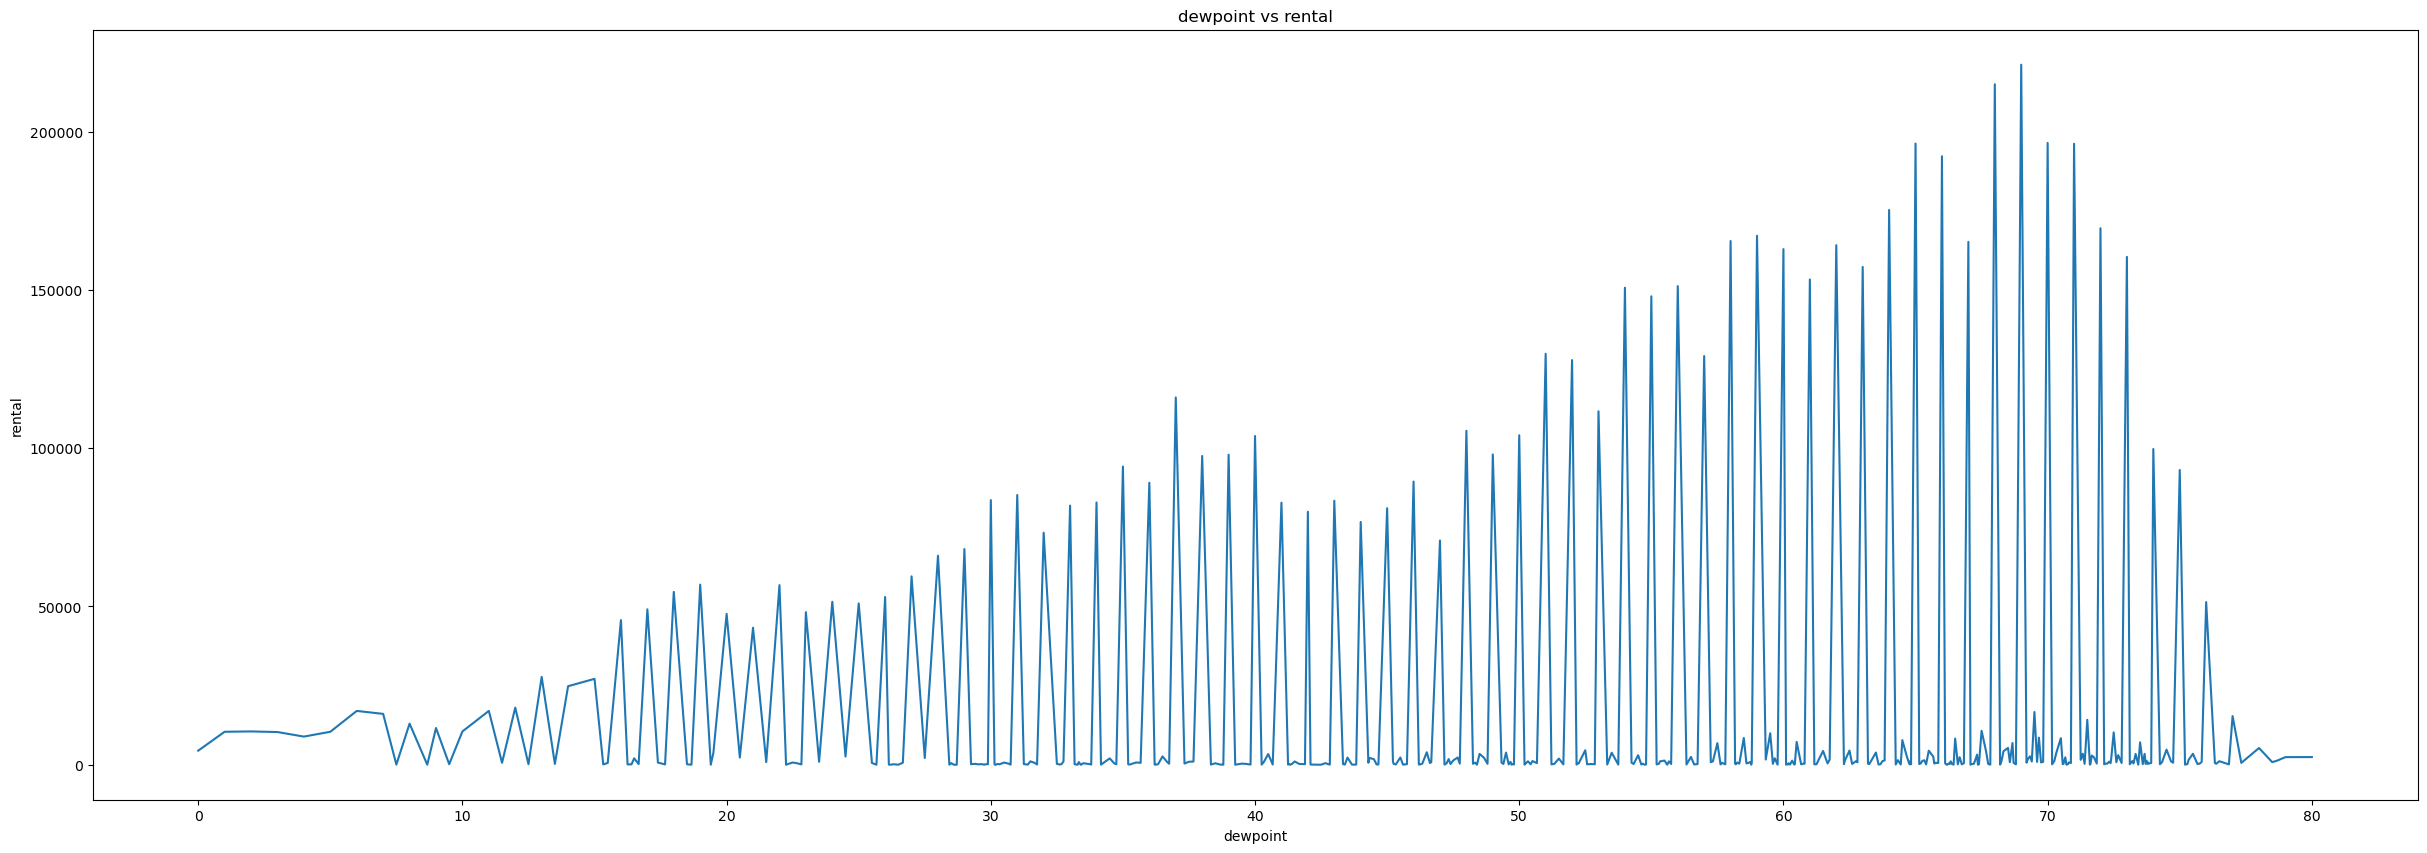

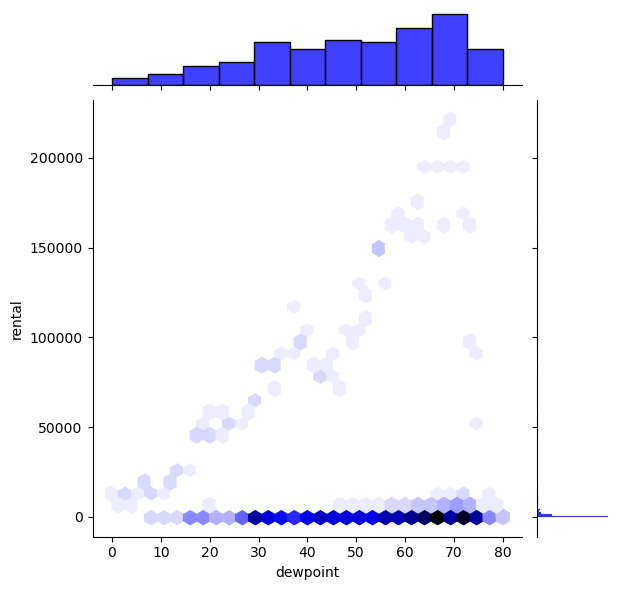

In [16]:
plt.plot(dtdew['dewpoint'],dtdew['rental'])
plt.xlabel('dewpoint')
plt.ylabel('rental')
plt.title("dewpoint vs rental")
sns.jointplot(x=dtdew['dewpoint'],y=dtdew['rental'],data=dtdew,kind='hex',color='blue')

In [17]:
#Checking humidity impact on Rental

dthumidity=dt.groupby(['humidity'])['rental'].sum().reset_index()

dthumidity.head(5)

,humidity,rental
0,13.0,2365
1,14.0,2953
2,15.0,8548
3,16.0,10409
4,17.0,6384


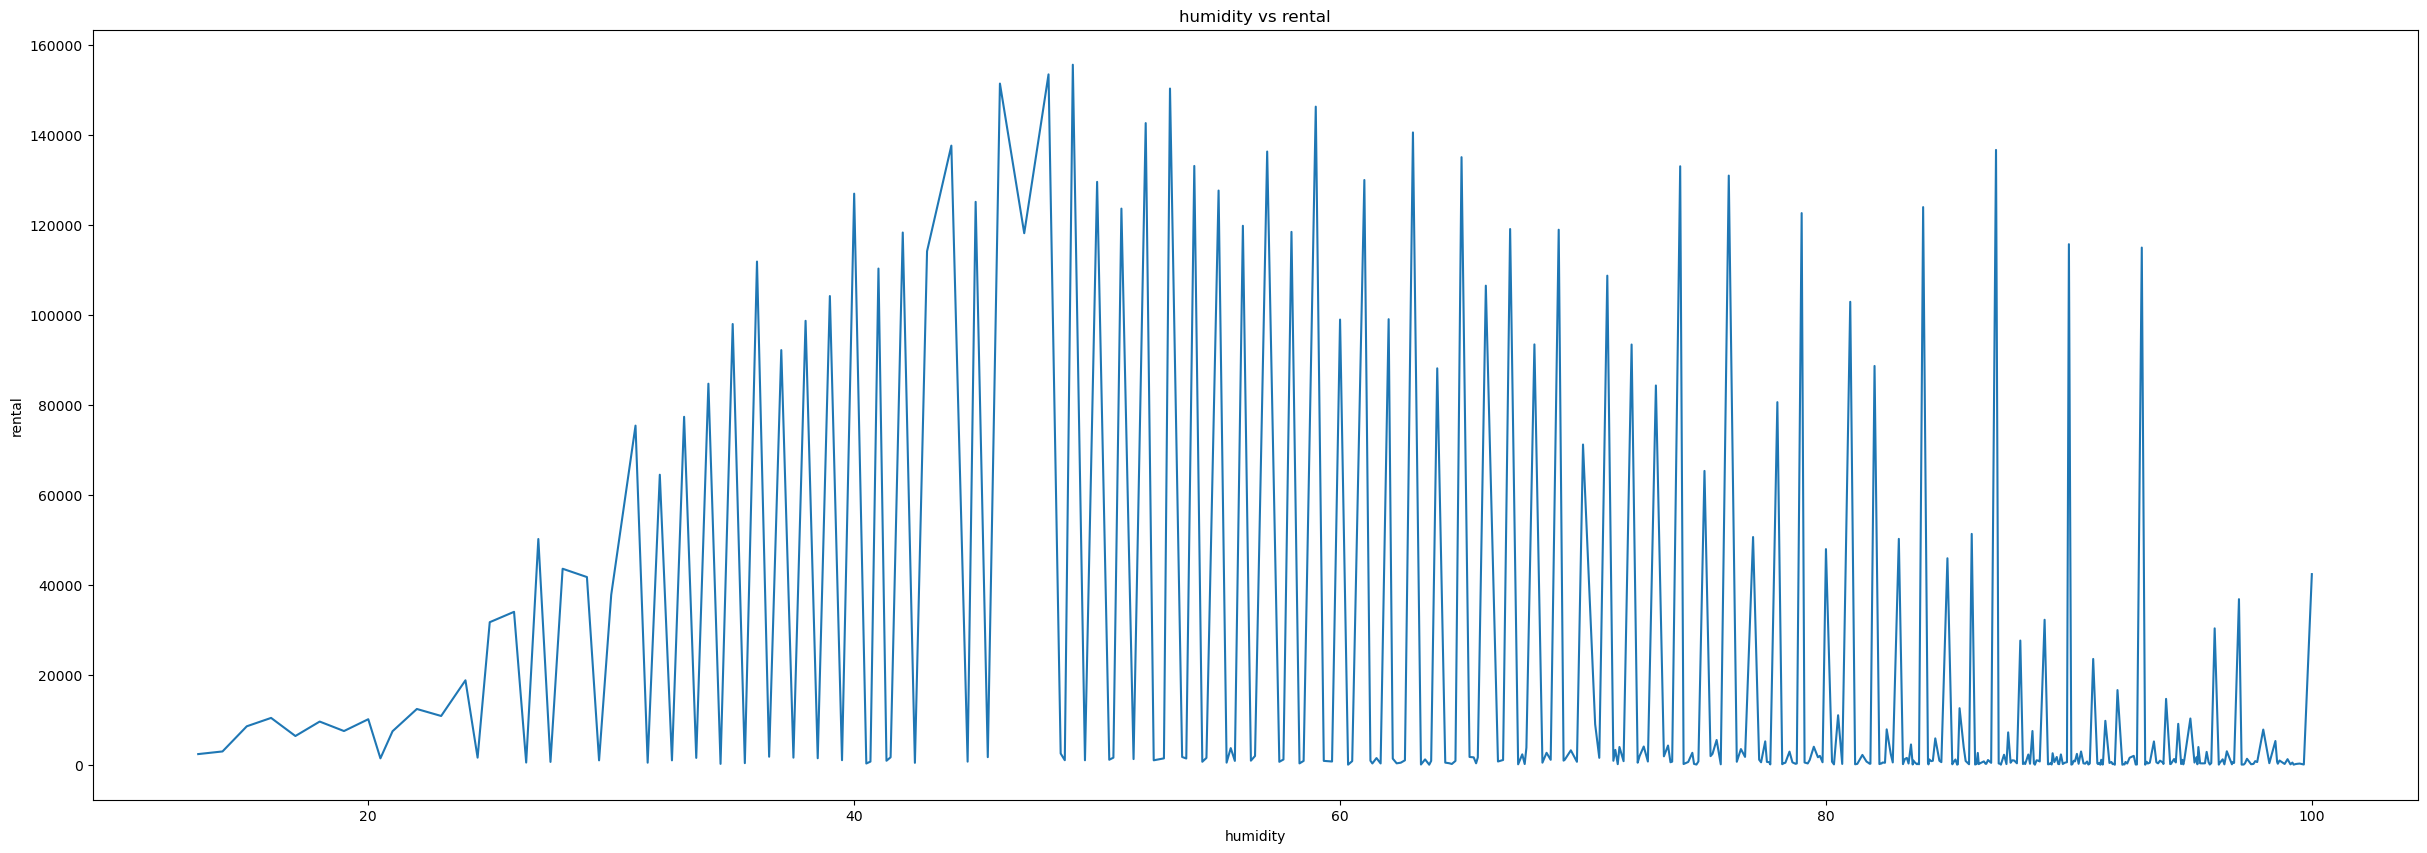

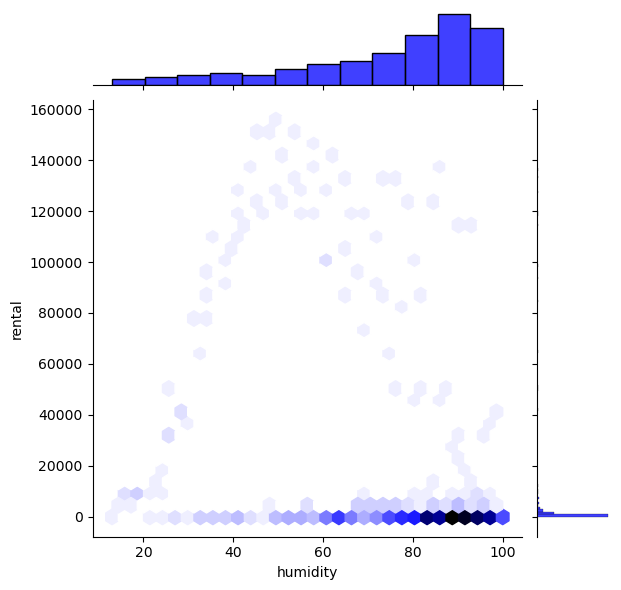

In [18]:
plt.plot(dthumidity['humidity'],dthumidity['rental'])
plt.xlabel('humidity')
plt.ylabel('rental')
plt.title("humidity vs rental")
sns.jointplot(x=dthumidity['humidity'],y=dthumidity['rental'],data=dthumidity,kind='hex', color='blue')

In [19]:
#Checking windspeed impact on rental

dtwindspeed=dt.groupby(['windspeed'])['rental'].sum().reset_index()

dtwindspeed.head(5)

,windspeed,rental
0,0.00,370189
1,0.50,209
2,0.60,1678
3,0.75,108
4,1.00,3273


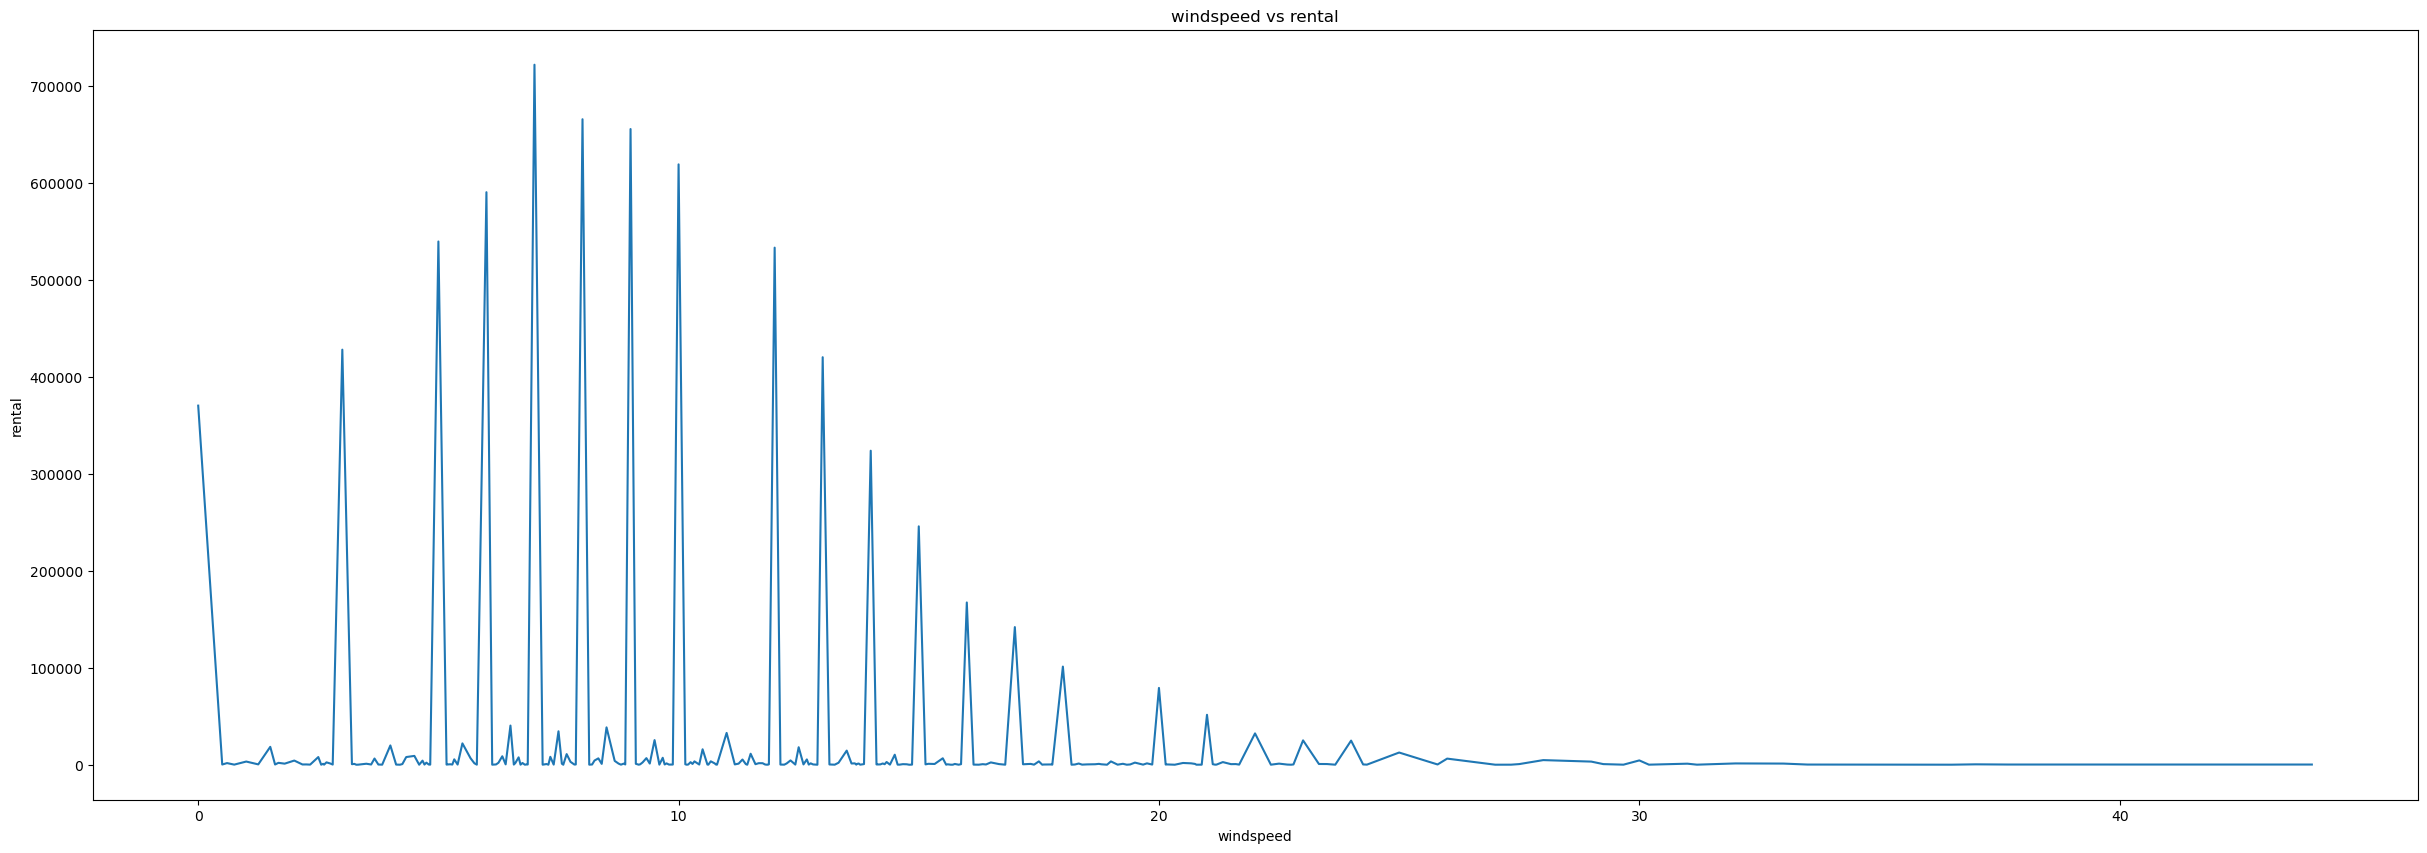

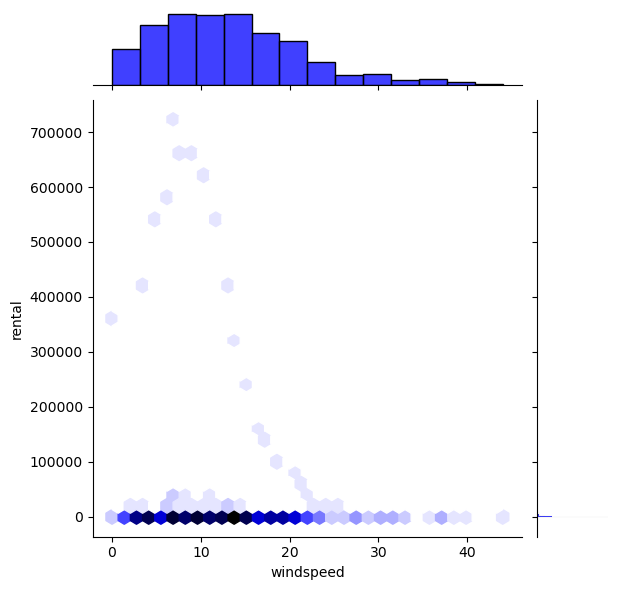

In [20]:
plt.plot(dtwindspeed['windspeed'],dtwindspeed['rental'])
plt.xlabel('windspeed')
plt.ylabel('rental')
plt.title("windspeed vs rental")
sns.jointplot(x=dtwindspeed['windspeed'],y=dtwindspeed['rental'],data=dtwindspeed,kind='hex', color= 'blue')

In [21]:
#Checking windgust impact on rental

dtwindgust=dt.groupby(['windgust'])['rental'].sum().reset_index()


dtwindgust.head(5)

,windgust,rental
0,0.00,6369423
1,2.00,30
2,2.33,561
3,2.44,164
4,3.33,187


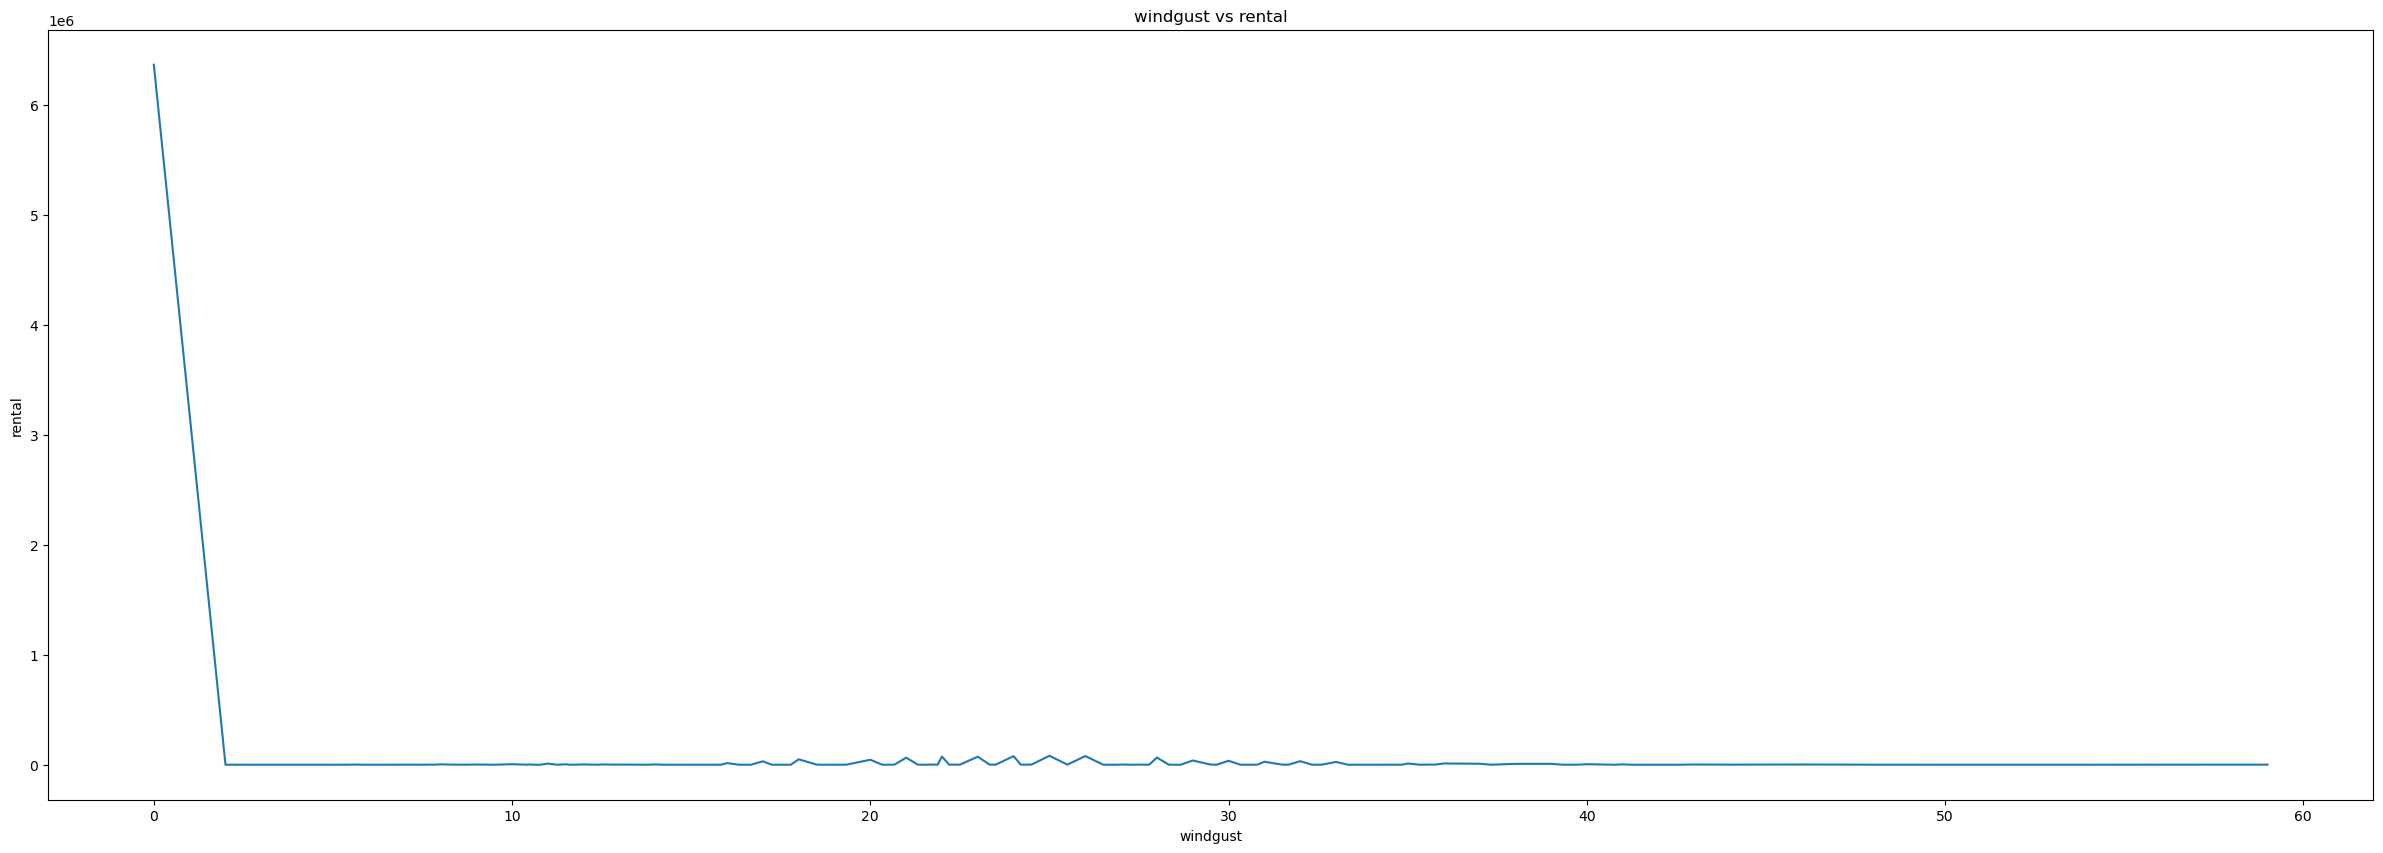

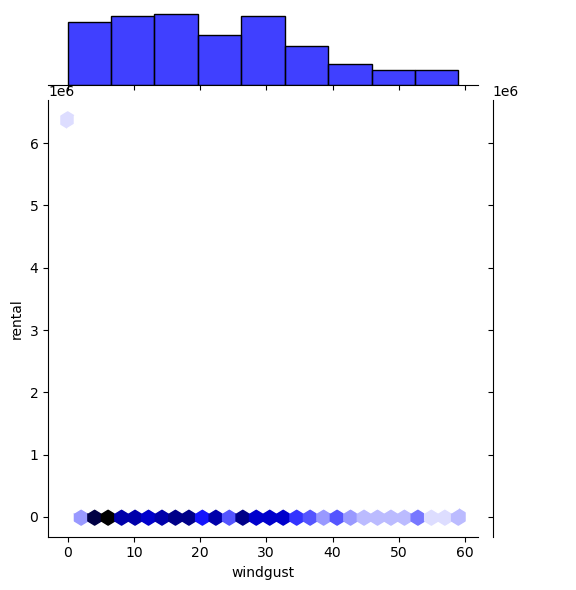

In [22]:
plt.plot(dtwindgust['windgust'],dtwindgust['rental'])
plt.xlabel('windgust')
plt.ylabel('rental')
plt.title("windgust vs rental")
sns.jointplot(x=dtwindgust['windgust'],y=dtwindgust['rental'],data=dtwindgust,kind='hex', color='blue')

In [23]:
#Checking pressure impact on rental

dtpressure=dt.groupby(['pressure'])['rental'].sum().reset_index()

dtpressure.head(5)

,pressure,rental
0,0.00,713
1,29.20,322
2,29.23,36
3,29.24,97
4,29.25,18


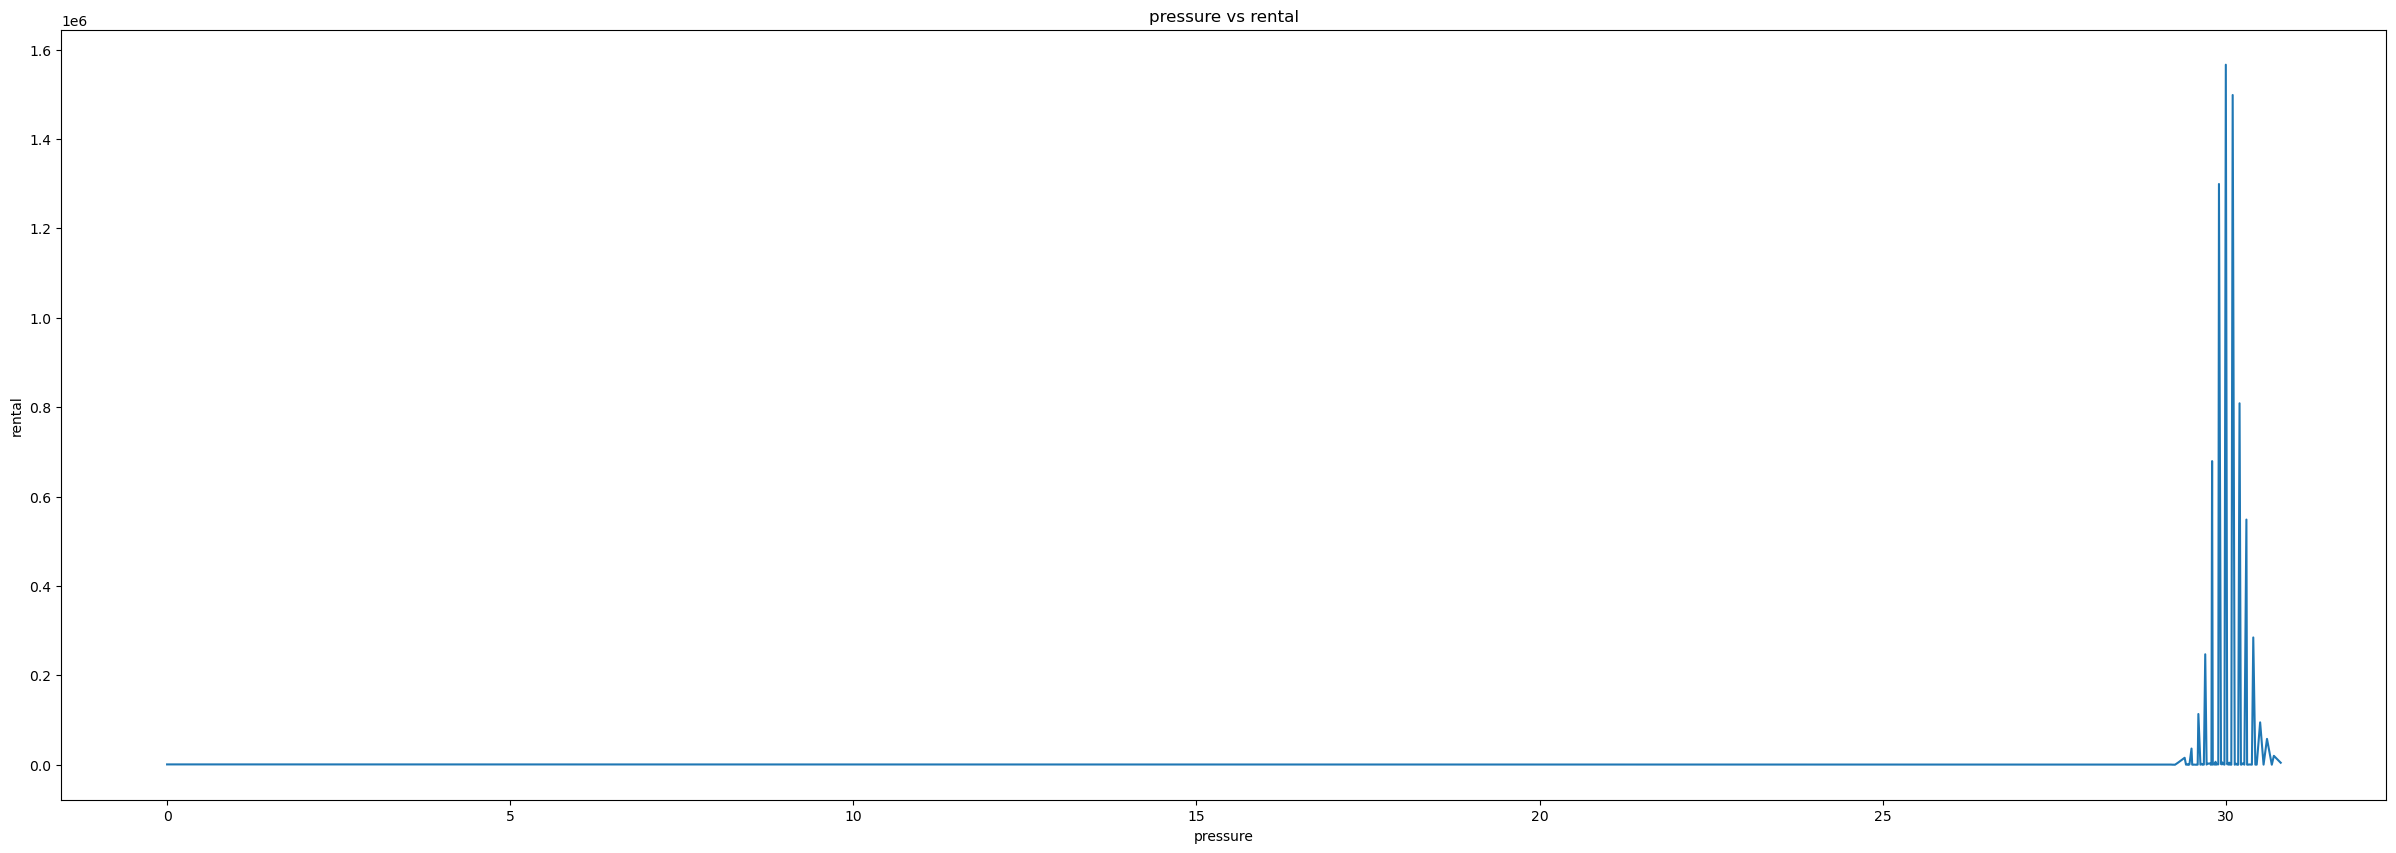

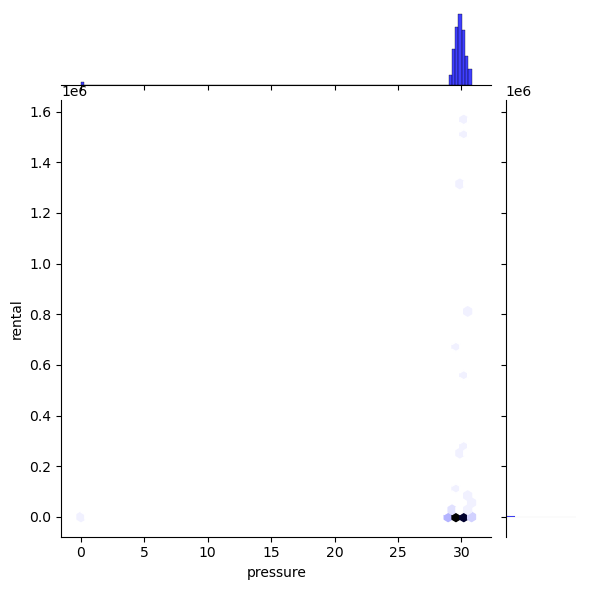

In [24]:
plt.plot(dtpressure['pressure'],dtpressure['rental'])
plt.xlabel('pressure')
plt.ylabel('rental')
plt.title("pressure vs rental")
sns.jointplot(x=dtpressure['pressure'],y=dtpressure['rental'],data=dtpressure,kind='hex', color='blue')

In [25]:
#Checking precip impact on rental

dtprecip=dt.groupby(['precip'])['rental'].sum().reset_index()

dtprecip.head(5)

,precip,rental
0,0.00,7255833
1,0.01,584
2,0.02,4450
3,0.03,5036
4,0.04,1095


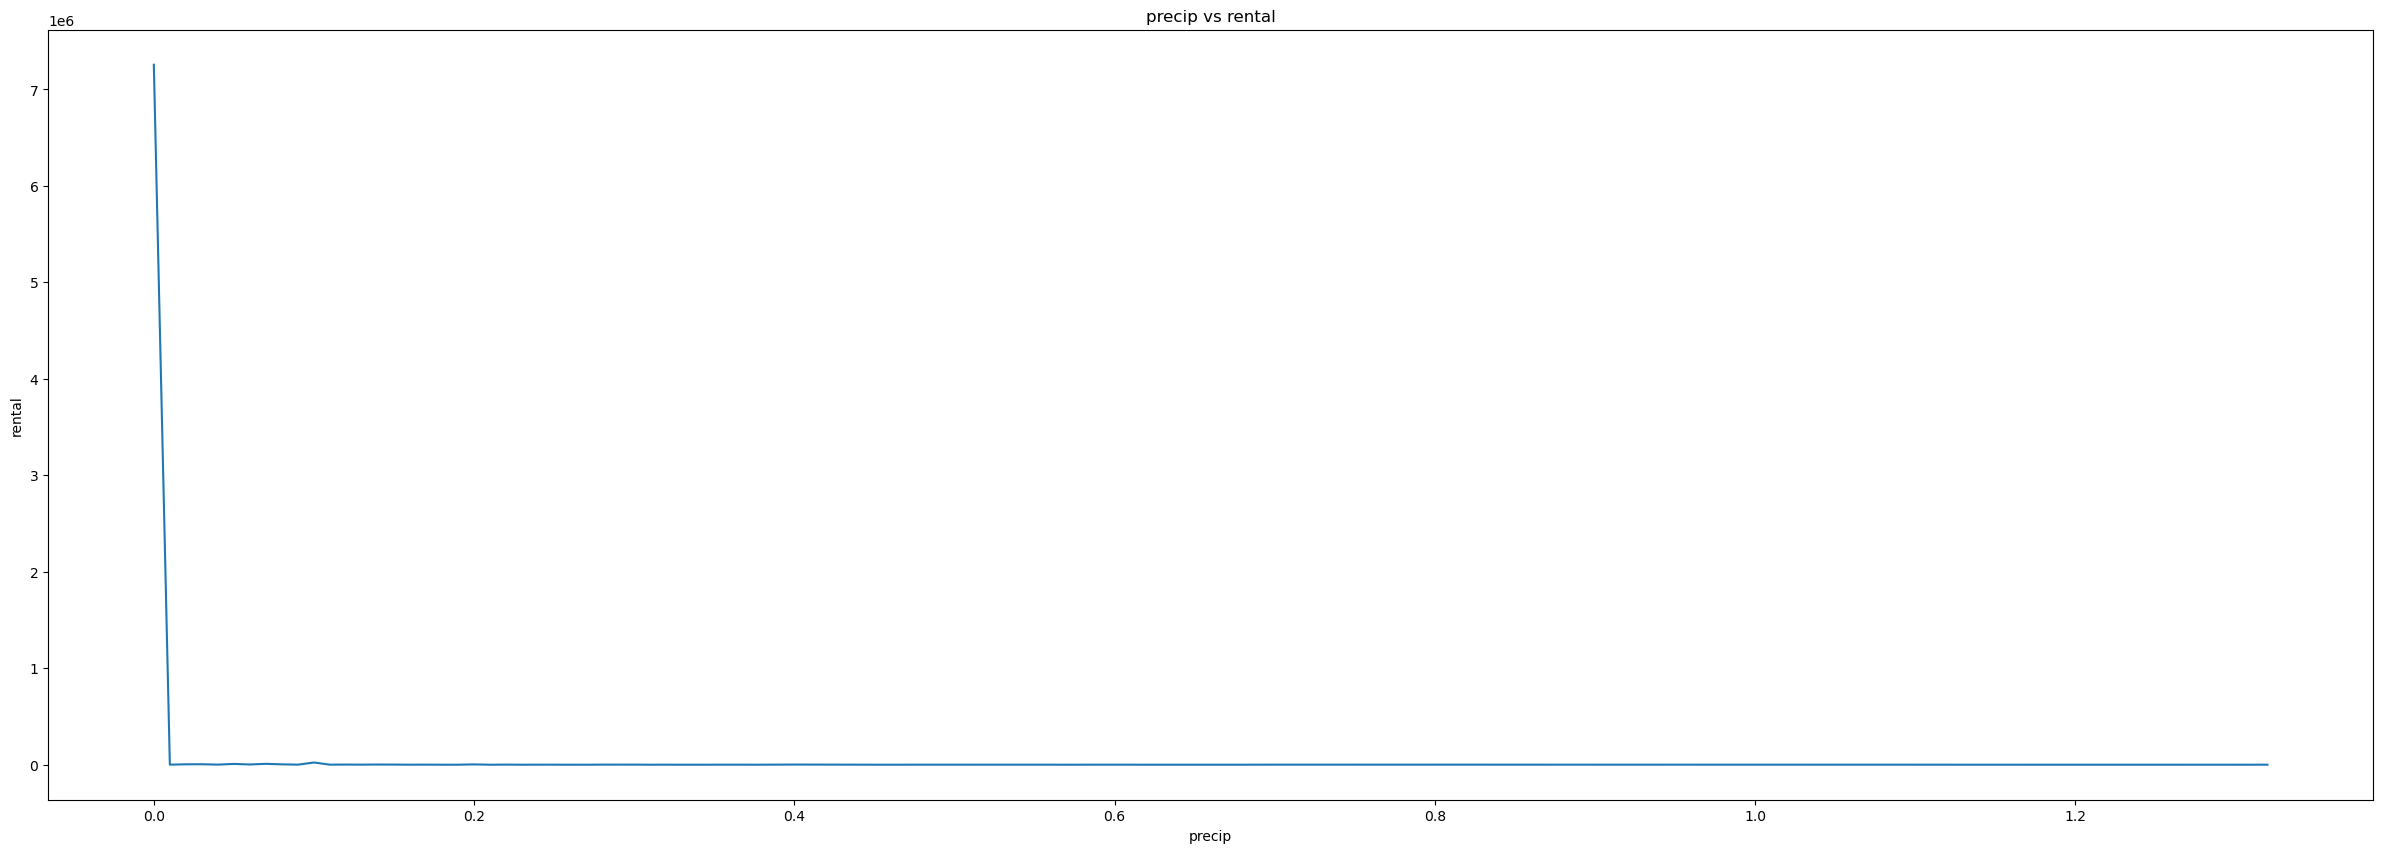

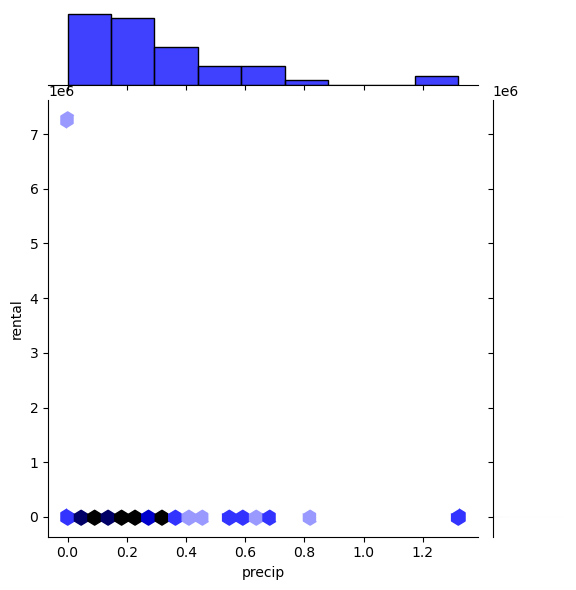

In [26]:
plt.plot(dtprecip['precip'],dtprecip['rental'])
plt.xlabel('precip')
plt.ylabel('rental')
plt.title("precip vs rental")
sns.jointplot(x=dtprecip['precip'],y=dtprecip['rental'],data=dtprecip,kind='hex',color='blue')

In [27]:
#Checking precipaccum impact on rental

dtprecipaccum=dt.groupby(['precipaccum'])['rental'].sum().reset_index()

dtprecipaccum.head(5)



,precipaccum,rental
0,0.00,7228150
1,0.02,2452
2,0.03,1714
3,0.05,10526
4,0.07,1895


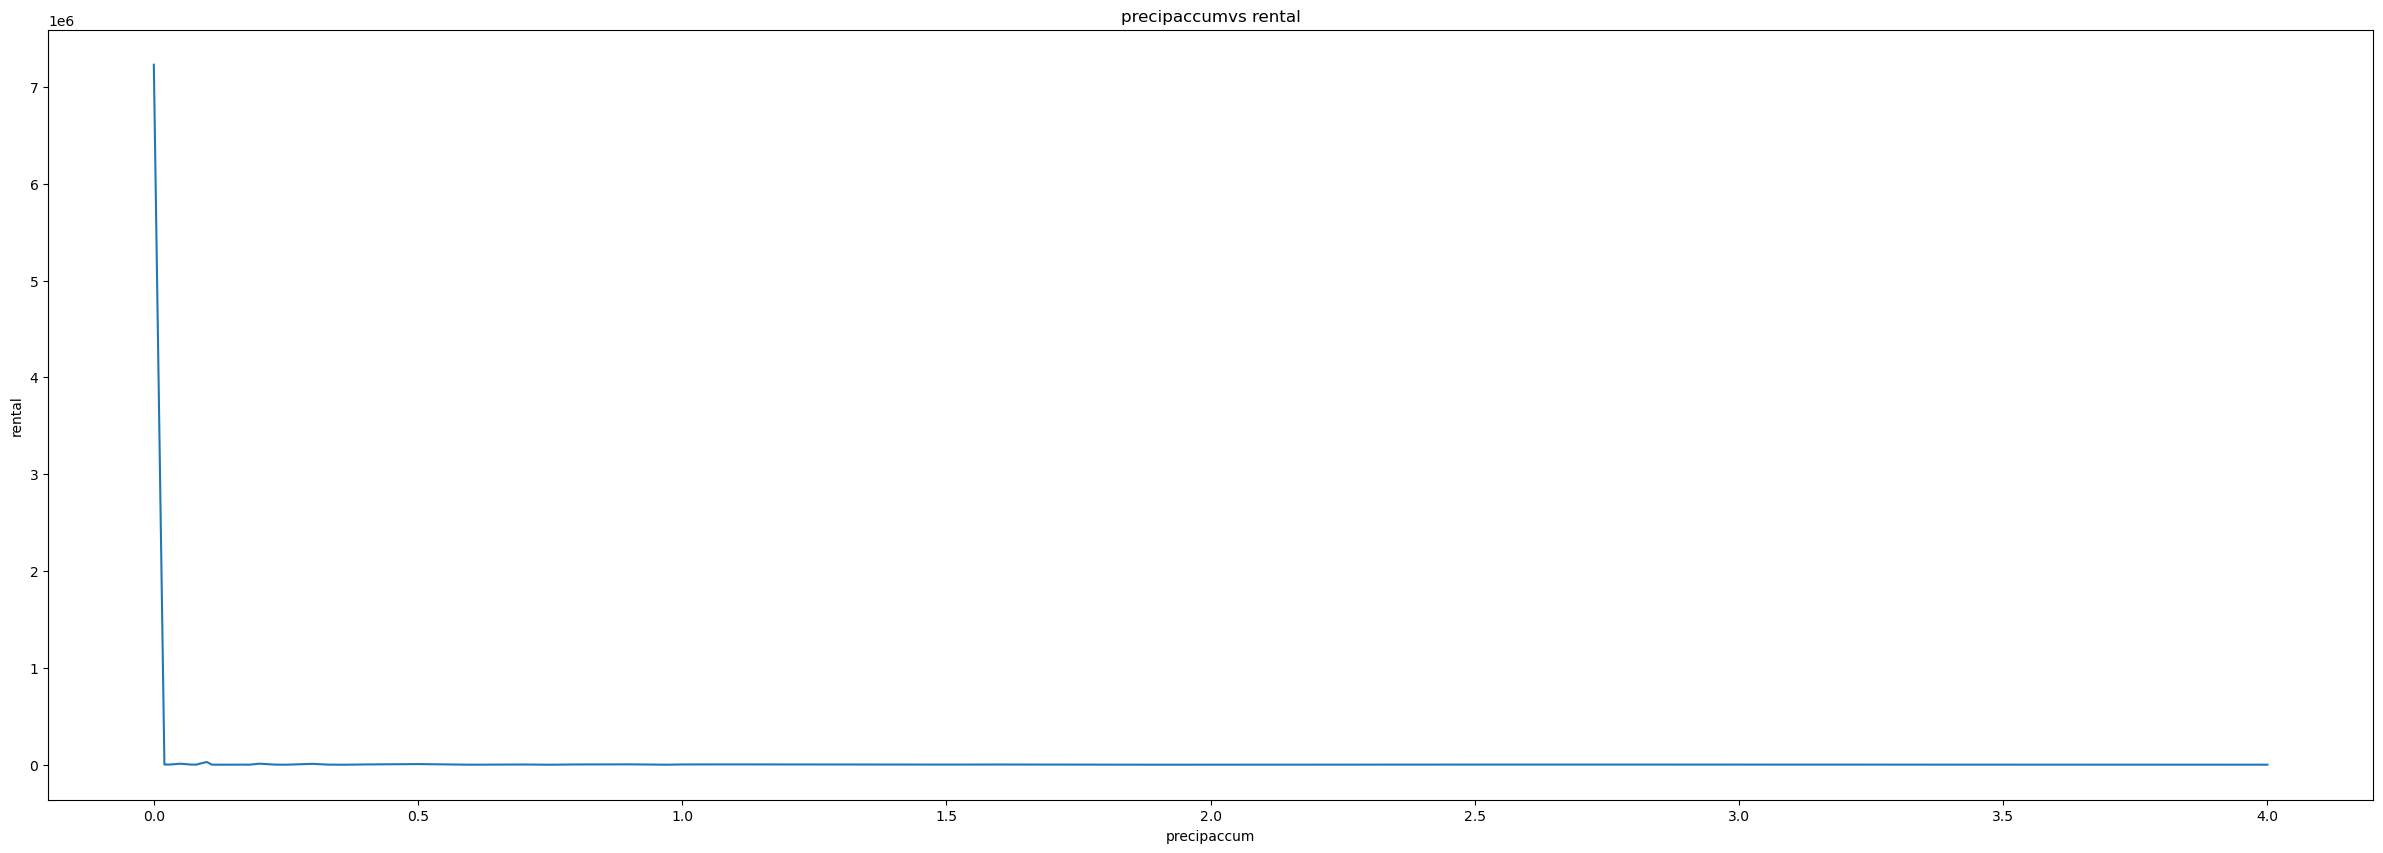

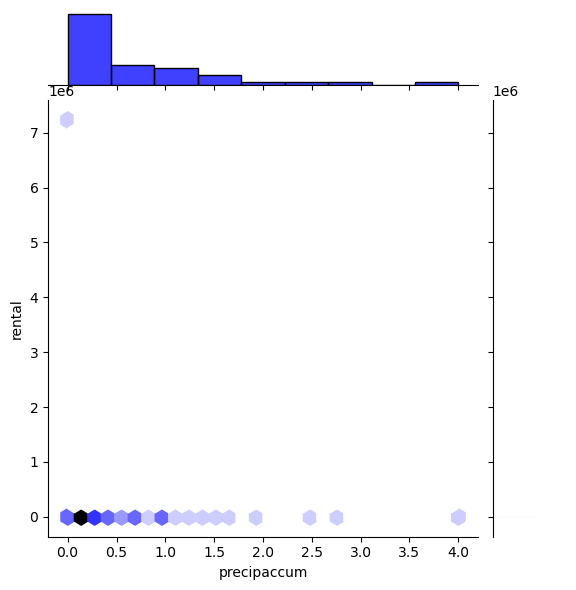

In [28]:
plt.plot(dtprecipaccum['precipaccum'],dtprecipaccum['rental'])
plt.xlabel('precipaccum')
plt.ylabel('rental')
plt.title("precipaccumvs rental")
sns.jointplot(x=dtprecipaccum['precipaccum'],y=dtprecipaccum['rental'],data=dtprecipaccum,kind='hex',color='blue')

In [29]:
#Checking weather impact on rental

dtweather=dt.groupby(['weather'])['rental'].sum().reset_index()
dtweather

,weather,rental
0,1,2766157
1,2,4106012
2,3,299613
3,4,166469


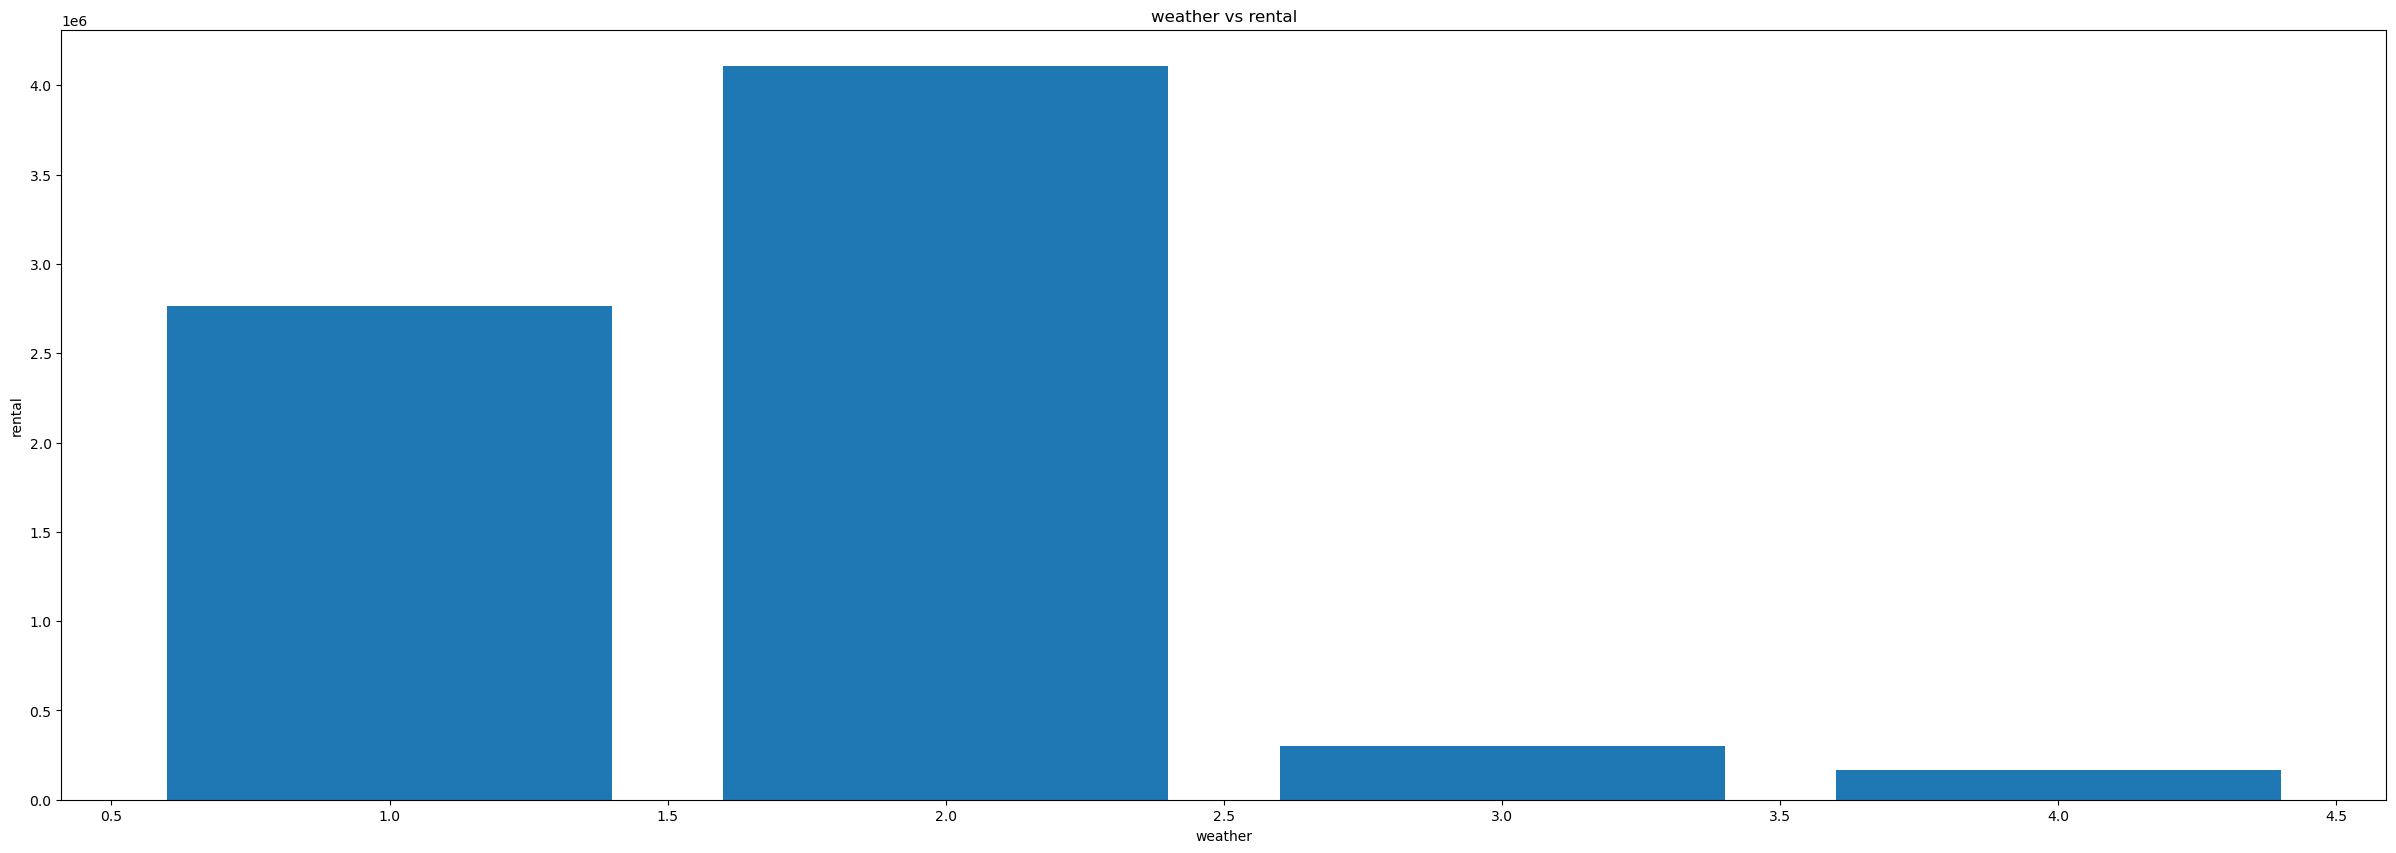

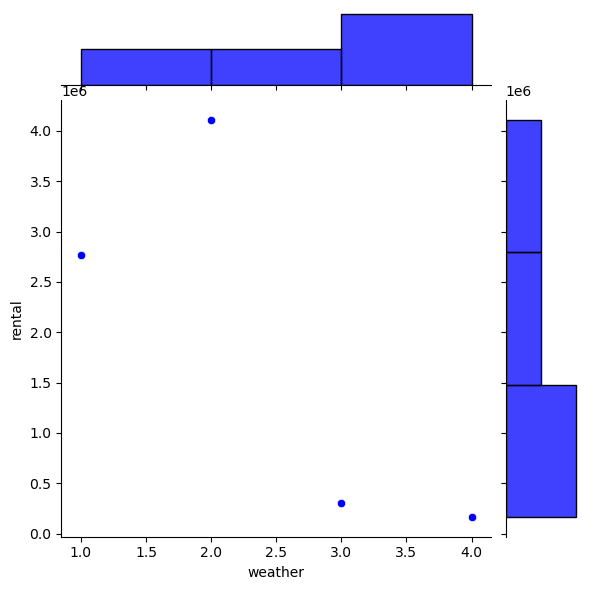

In [30]:
plt.bar(dtweather['weather'],dtweather['rental'])
plt.xlabel('weather')
plt.ylabel('rental')
plt.title("weather vs rental")
sns.jointplot(x=dtweather['weather'],y=dtweather['rental'],data=dtweather,kind='scatter',color='blue')

In [31]:
dt_reg=dt.copy()
dt_reg.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11


In [32]:
#Replacing strings with numeric values
dt_reg['season'].replace(to_replace = ['fall','winter','summer','spring'], value = [1,2,3,4],inplace=True)

In [33]:
dt_reg.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,1,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,1,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,1,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,1,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,1,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11


In [34]:
X = dt_reg.loc[:,(dt_reg.columns != 'rental')]

In [35]:
Y = dt_reg.rental

In [36]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3, random_state=1) 

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train,Y_train)

LinearRegression()

In [39]:
Y_pred = model.predict(X_test)

In [40]:
model.coef_

array([-1.97591625e+01, -2.70265333e+00,  8.31238706e-02,  1.58502380e+00,
        1.13599423e+00,  9.47902413e+01,  5.50252825e+00,  1.11407602e+01,
       -2.86257918e+00, -7.74213715e-01, -2.51160962e-01, -1.99538071e-01,
        9.37599893e+00, -5.56129297e+01, -4.97417455e+01,  7.78769062e+00])

In [41]:
model.intercept_

39594.528107471975

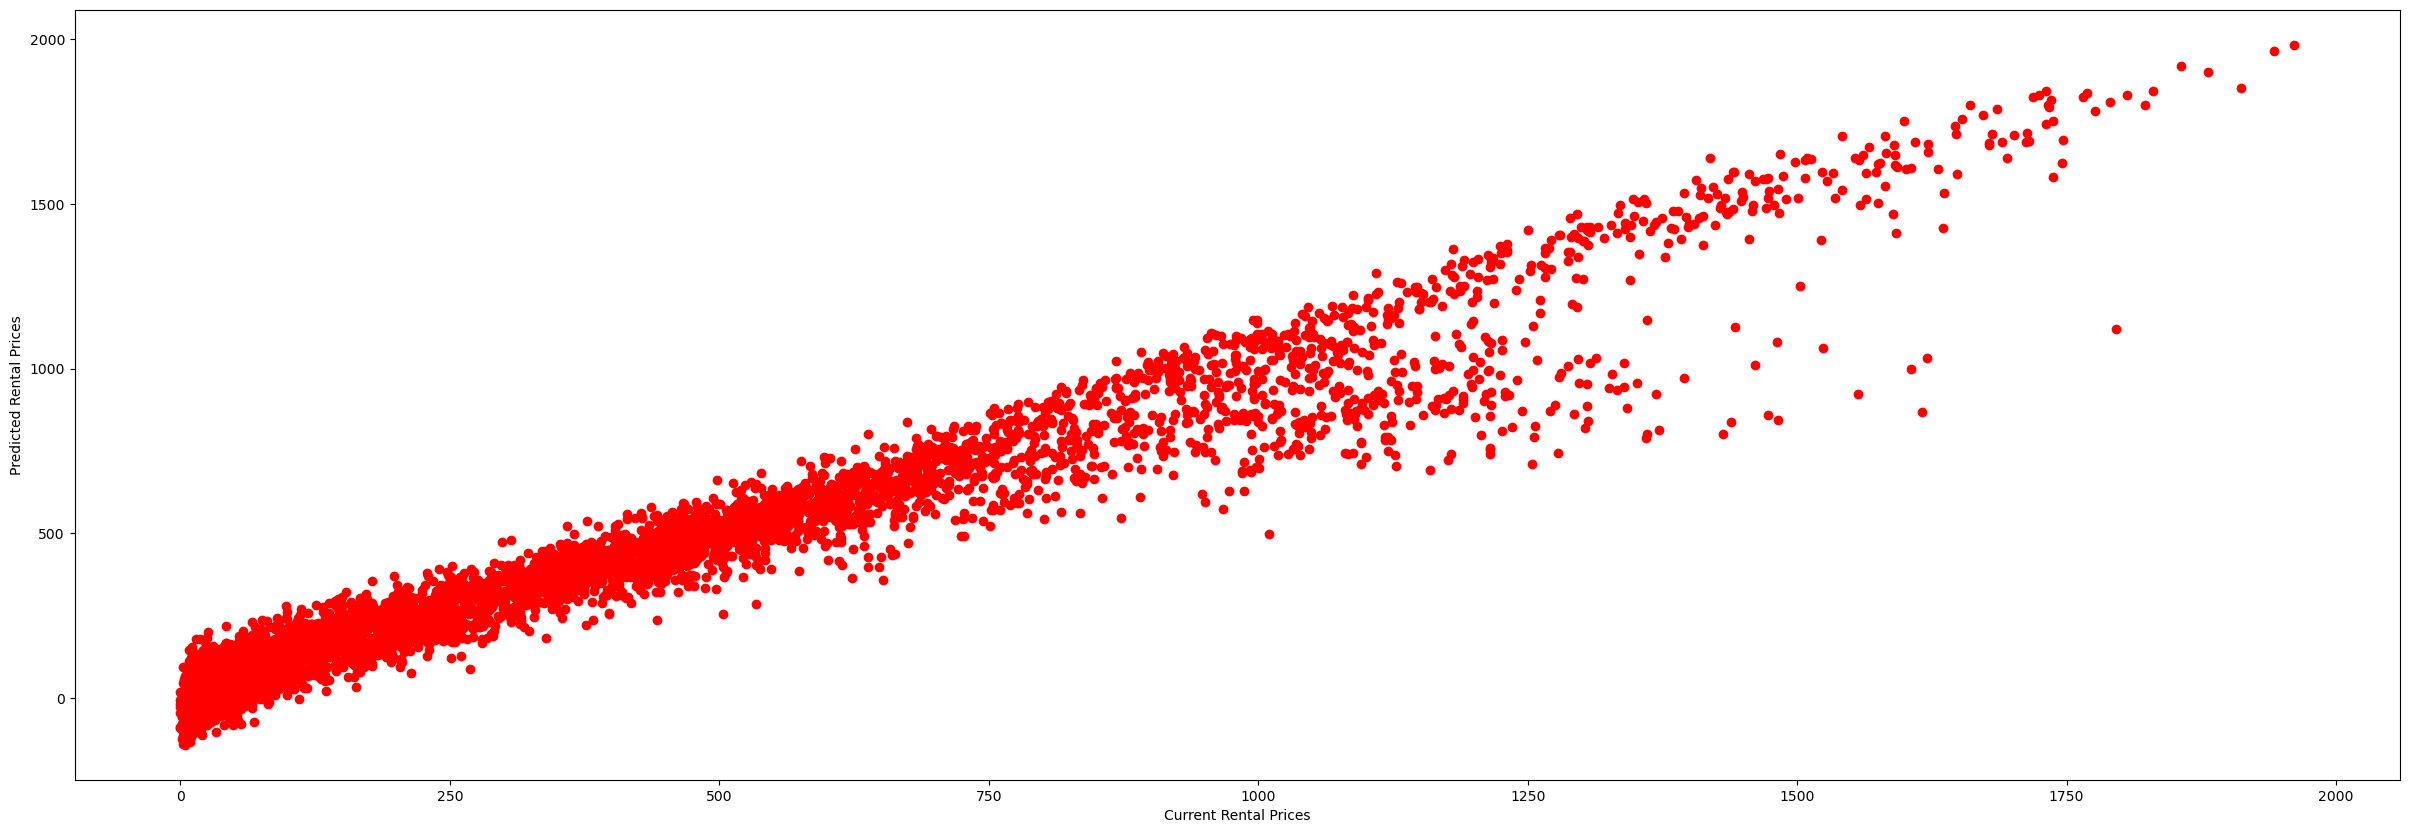

In [42]:
plt.scatter(Y_test,Y_pred, color ='r')
plt.xlabel('Current Rental Prices')
plt.ylabel('Predicted Rental Prices')
plt.rcParams["figure.figsize"] = (25,5)

In [43]:

print('Mean Absolute Error :', mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error : 63.518953415793135


In [44]:
print('Sqrt Mean Absolute Error :',sqrt(mean_absolute_error(Y_test, Y_pred)))

Sqrt Mean Absolute Error : 7.969877879603497


In [45]:
print('R_squared Value:',r2_score(Y_test, Y_pred))

R_squared Value: 0.9468358089024099


In [46]:
#Cross Validation of the regression model

cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [47]:
scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [48]:
print('Mean Absolute Error from CV :',mean(absolute(scores)))

Mean Absolute Error from CV : 62.854088835251446
